# Problem Statement

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

### Goal & Objective: 

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.options.display.max_columns = None

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:
df1 = pd.read_csv("Data.csv")
df = df1.set_index('Ware_house_ID')
df.head()

WH_Manager_ID Location_type WH_capacity_size   zone  \
Ware_house_ID                                                       
WH_100000         EID_50000         Urban            Small   West   
WH_100001         EID_50001         Rural            Large  North   
WH_100002         EID_50002         Rural              Mid  South   
WH_100003         EID_50003         Rural              Mid  North   
WH_100004         EID_50004         Rural            Large  North   

              WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
Ware_house_ID                                                             
WH_100000               Zone 6                   3                    1   
WH_100001               Zone 5                   0                    0   
WH_100002               Zone 2                   1                    0   
WH_100003               Zone 3                   7                    4   
WH_100004               Zone 5                   3                    1   

               Competitor_in_mkt  retail_shop_num  wh_owner_type  \
Ware_house_ID                                                      
WH_100000                      2             4651         Rented   
WH_100001                      4             6217  Company Owned   
WH_100002                      4             4306  Company Owned   
WH_100003                      2             6000         Rented   
WH_100004                      2             4740  Company Owned   

               distributor_num  flood_impacted  flood_proof  electric_supply  \
Ware_house_ID                                                                  
WH_100000                   24               0            1                1   
WH_100001                   47               0            0                1   
WH_100002                   64               0            0                0   
WH_100003                   50               0            0                0   
WH_100004                   42               1            0                1   

               dist_from_hub  workers_num  wh_est_year  \
Ware_house_ID                                            
WH_100000                 91         29.0          NaN   
WH_100001                210         31.0          NaN   
WH_100002                161         37.0          NaN   
WH_100003                103         21.0          NaN   
WH_100004                112         25.0       2009.0   

               storage_issue_reported_l3m  temp_reg_mach  \
Ware_house_ID                                              
WH_100000                              13              0   
WH_100001                               4              0   
WH_100002                              17              0   
WH_100003                              17              1   
WH_100004                              18              0   

              approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
Ware_house_ID                                                                  
WH_100000                                A                 5              15   
WH_100001                                A                 3              17   
WH_100002                                A                 6              22   
WH_100003                               A+                 3              27   
WH_100004                                C                 6              24   

               product_wg_ton  
Ware_house_ID                  
WH_100000               17115  
WH_100001                5074  
WH_100002               23137  
WH_100003               22115  
WH_100004               24071

In [3]:
df.tail()

WH_Manager_ID Location_type WH_capacity_size   zone  \
Ware_house_ID                                                       
WH_124995         EID_74995         Rural            Small  North   
WH_124996         EID_74996         Rural              Mid   West   
WH_124997         EID_74997         Urban            Large  South   
WH_124998         EID_74998         Rural            Small  North   
WH_124999         EID_74999         Rural              Mid   West   

              WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
Ware_house_ID                                                             
WH_124995               Zone 1                   3                    0   
WH_124996               Zone 2                   6                    0   
WH_124997               Zone 5                   7                    0   
WH_124998               Zone 1                   1                    0   
WH_124999               Zone 4                   8                    2   

               Competitor_in_mkt  retail_shop_num  wh_owner_type  \
Ware_house_ID                                                      
WH_124995                      4             5390         Rented   
WH_124996                      4             4490  Company Owned   
WH_124997                      2             5403         Rented   
WH_124998                      2            10562         Rented   
WH_124999                      4             5664  Company Owned   

               distributor_num  flood_impacted  flood_proof  electric_supply  \
Ware_house_ID                                                                  
WH_124995                   19               0            0                1   
WH_124996                   57               0            0                1   
WH_124997                   31               1            0                1   
WH_124998                   25               0            0                1   
WH_124999                   21               0            1                1   

               dist_from_hub  workers_num  wh_est_year  \
Ware_house_ID                                            
WH_124995                142         34.0       2005.0   
WH_124996                130         28.0       2012.0   
WH_124997                147          NaN          NaN   
WH_124998                 60         25.0          NaN   
WH_124999                239         39.0       2019.0   

               storage_issue_reported_l3m  temp_reg_mach  \
Ware_house_ID                                              
WH_124995                              22              1   
WH_124996                              10              0   
WH_124997                              23              0   
WH_124998                              18              0   
WH_124999                               4              0   

              approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
Ware_house_ID                                                                  
WH_124995                                A                 2              30   
WH_124996                                B                 4              18   
WH_124997                               B+                 5              25   
WH_124998                                A                 6              30   
WH_124999                               B+                 2              11   

               product_wg_ton  
Ware_house_ID                  
WH_124995               32093  
WH_124996               12114  
WH_124997               27080  
WH_124998               25093  
WH_124999                5058

In [4]:
df.shape

(25000, 23)

In [5]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [6]:
df.describe(include='all')

WH_Manager_ID Location_type WH_capacity_size   zone WH_regional_zone  \
count          25000         25000            25000  25000            25000   
unique         25000             2                3      4                6   
top        EID_50837         Rural            Large  North           Zone 6   
freq               1         22957            10169  10278             8339   
mean             NaN           NaN              NaN    NaN              NaN   
std              NaN           NaN              NaN    NaN              NaN   
min              NaN           NaN              NaN    NaN              NaN   
25%              NaN           NaN              NaN    NaN              NaN   
50%              NaN           NaN              NaN    NaN              NaN   
75%              NaN           NaN              NaN    NaN              NaN   
max              NaN           NaN              NaN    NaN              NaN   

        num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count         25000.000000         25000.000000       25000.000000   
unique                 NaN                  NaN                NaN   
top                    NaN                  NaN                NaN   
freq                   NaN                  NaN                NaN   
mean              4.089040             0.773680           3.104200   
std               2.606612             1.199449           1.141663   
min               0.000000             0.000000           0.000000   
25%               2.000000             0.000000           2.000000   
50%               4.000000             0.000000           3.000000   
75%               6.000000             1.000000           4.000000   
max               8.000000             5.000000          12.000000   

        retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
count      25000.000000          25000     25000.000000    25000.000000   
unique              NaN              2              NaN             NaN   
top                 NaN  Company Owned              NaN             NaN   
freq                NaN          13578              NaN             NaN   
mean        4985.711560            NaN        42.418120        0.098160   
std         1052.825252            NaN        16.064329        0.297537   
min         1821.000000            NaN        15.000000        0.000000   
25%         4313.000000            NaN        29.000000        0.000000   
50%         4859.000000            NaN        42.000000        0.000000   
75%         5500.000000            NaN        56.000000        0.000000   
max        11008.000000            NaN        70.000000        1.000000   

         flood_proof  electric_supply  dist_from_hub   workers_num  \
count   25000.000000     25000.000000   25000.000000  24010.000000   
unique           NaN              NaN            NaN           NaN   
top              NaN              NaN            NaN           NaN   
freq             NaN              NaN            NaN           NaN   
mean        0.054640         0.656880     163.537320     28.944398   
std         0.227281         0.474761      62.718609      7.872534   
min         0.000000         0.000000      55.000000     10.000000   
25%         0.000000         0.000000     109.000000     24.000000   
50%         0.000000         1.000000     164.000000     28.000000   
75%         0.000000         1.000000     218.000000     33.000000   
max         1.000000         1.000000     271.000000     98.000000   

         wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
count   13119.000000                25000.000000   25000.000000   
unique           NaN                         NaN            NaN   
top              NaN                         NaN            NaN   
freq             NaN                         NaN            NaN   
mean     2009.383185                   17.130440       0.303280   
std         7.528230                    9.161108       0.459684   
min   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, WH_100000 to WH_124999
Data columns (total 23 columns):
WH_Manager_ID                   25000 non-null object
Location_type                   25000 non-null object
WH_capacity_size                25000 non-null object
zone                            25000 non-null object
WH_regional_zone                25000 non-null object
num_refill_req_l3m              25000 non-null int64
transport_issue_l1y             25000 non-null int64
Competitor_in_mkt               25000 non-null int64
retail_shop_num                 25000 non-null int64
wh_owner_type                   25000 non-null object
distributor_num                 25000 non-null int64
flood_impacted                  25000 non-null int64
flood_proof                     25000 non-null int64
electric_supply                 25000 non-null int64
dist_from_hub                   25000 non-null int64
workers_num                     24010 non-null float64
wh_est_year                 

In [8]:
df.isnull().sum()

WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
(df.isnull().sum()/len(df))*100

WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [10]:
product_wg_ton_across_zone = pd.pivot_table(df, values=['product_wg_ton'], index=['wh_est_year', 'zone'])
product_wg_ton_across_zone

product_wg_ton
wh_est_year zone                 
1996.0      East     34614.500000
            North    35020.408451
            South    34025.018182
            West     35422.793651
1997.0      East     38114.000000
            North    33936.573643
            South    35382.709677
            West     35517.509434
1998.0      East     35213.000000
            North    34781.502415
            South    34106.789474
            West     35985.016854
1999.0      East     36108.125000
            North    35009.727273
            South    35651.128440
            West     34140.339744
2000.0      East     33971.000000
            North    34906.995370
            South    35655.122449
            West     35329.072222
2001.0      East     31740.250000
            North    35491.553191
            South    34360.077586
            West     34776.415094
2002.0      East     34183.230769
            North    33973.155251
            South    36317.668966
            West     34866.089744
2003.0      East     34177.133333
            North    34648.120879
            South    33887.889764
            West     34219.503448
2004.0      East     31641.222222
            North    34783.854922
            South    34027.590551
            West     34954.870968
2005.0      East     33277.000000
            North    33919.203125
            South    35619.336283
            West     34580.838150
2006.0      East     34548.636364
            North    30833.514286
            South    30423.551724
            West     32873.396450
2007.0      East     32446.750000
            North    29402.629630
            South    27220.176923
            West     27698.611765
2008.0      East     24899.100000
            North    24836.410628
            South    24398.534884
            West     23952.889571
2009.0      East     24235.000000
            North    24849.004762
            South    24451.543478
            West     24156.908046
2010.0      East     25927.000000
            North    24605.853774
            South    24592.424000
            West     24570.490446
2011.0      East     23329.777778
            North    24066.051282
            South    24111.007937
            West     23842.820513
2012.0      East     21084.181818
            North    21702.763158
            South    21847.757282
            West     21897.587097
2013.0      East     17593.000000
            North    19005.283105
            South    19113.560976
            West     20260.391026
2014.0      East     16667.111111
            North    17308.068966
            South    17780.398305
            West     17476.488372
2015.0      East     18803.428571
            North    17583.047368
            South    17794.420290
            West     18133.311377
2016.0      East     12922.166667
            North    15515.125604
            South    15580.769841
            West     15270.357143
2017.0      East     14795.600000
            North    12491.573684
            South    15243.507937
            West     12911.845679
2018.0      East      9288.800000
            North    10714.478469
            South    10941.745902
            West     10786.660494
2019.0      East      8495.300000
            North     9519.471963
            South     9351.658915
            West      8961.844156
2020.0      East      7854.333333
            North     8125.322751
            South     7686.708029
            West      7639.525316
2021.0      East      6762.333333
            North     7062.221622
            South     6975.395522
            West      7092.319018
2022.0      East      5913.200000
            North     6741.923611
            South     7181.298701
            West      6950.839623
2023.0      East      7610.500000
            North     7774.068966
            South     7004.612245
            West      6551.484848

In [11]:
pd.pivot_table(df, values=['product_wg_ton'], index=['Location_type','WH_capacity_size', 'zone'])

product_wg_ton
Location_type WH_capacity_size zone                 
Rural         Large            East     23981.428571
                               North    21862.335525
                               South    21729.573549
                               West     21680.658333
              Mid              East     22744.659483
                               North    21859.001834
                               South    21733.035005
                               West     22155.852560
              Small            East     20632.795699
                               North    22013.538694
                               South    21757.077731
                               West     21385.648944
Urban         Large            East     22343.500000
                               North    26143.980892
                               South    24290.804511
                               West     24601.686957
              Mid              East     25277.000000
                               North    25354.335766
                               South    24749.337500
                               West     24806.487179
              Small            East     28465.500000
                               North    23744.112782
                               South    23418.527778
                               West     24939.333333

In [12]:
df.groupby(['Location_type','WH_capacity_size','zone']).size()

Location_type  WH_capacity_size  zone 
Rural          Large             East       70
                                 North    5019
                                 South    1482
                                 West     2760
               Mid               East      232
                                 North    2727
                                 South    2971
                                 West     3242
               Small             East       93
                                 North    1654
                                 South    1428
                                 West     1279
Urban          Large             East        4
                                 North     471
                                 South     133
                                 West      230
               Mid               East       22
                                 North     274
                                 South     240
                                 West      312
               Small 

In [13]:
df.groupby(['flood_impacted','flood_proof','electric_supply']).size()

flood_impacted  flood_proof  electric_supply
0               0            0                   8204
                             1                  13291
                1            0                    114
                             1                    937
1               0            0                    215
                             1                   1924
                1            0                     45
                             1                    270
dtype: int64

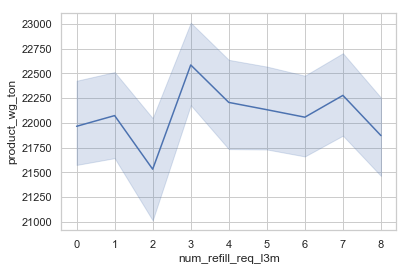

In [14]:
sns.lineplot(df['num_refill_req_l3m'],df['product_wg_ton'])

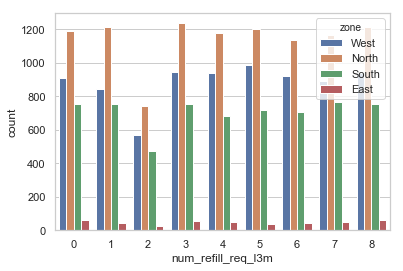

In [15]:
sns.countplot(df['num_refill_req_l3m'],hue=df["zone"])
plt.show()

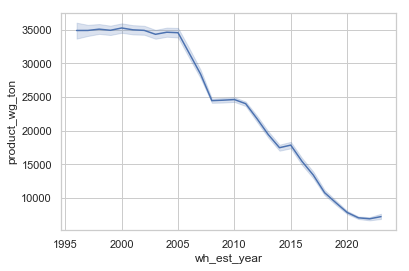

In [16]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = df['wh_est_year']
# xline = df['product_wg_ton']
# yline = df['retail_shop_num']
# ax.plot3D(xline, yline, zline, 'gray')
sns.lineplot(df['wh_est_year'],df['product_wg_ton'])

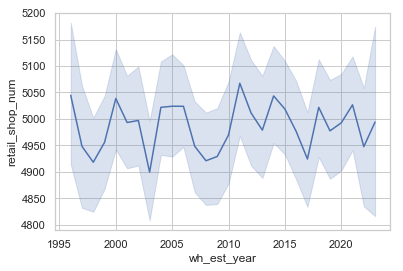

In [17]:
sns.lineplot(df['wh_est_year'],df['retail_shop_num'])

# 3) Exploratory data analysis

### Univariate analysis

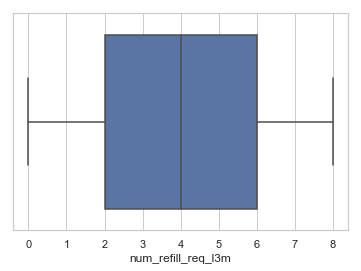

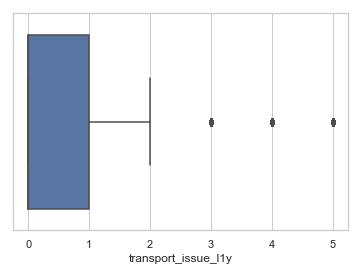

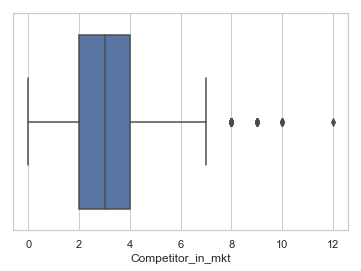

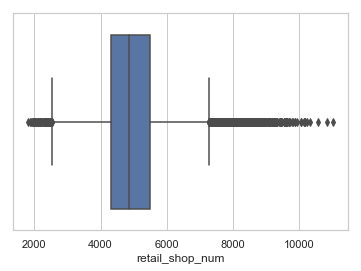

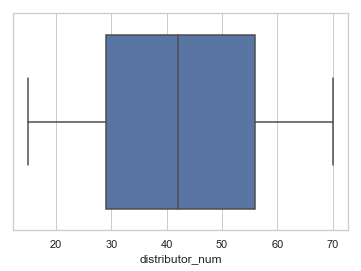

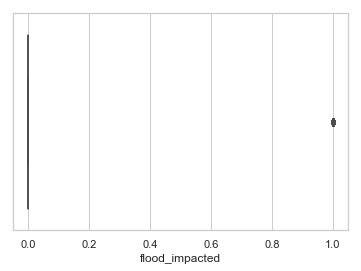

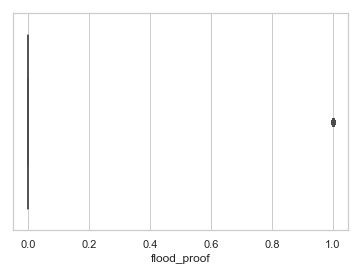

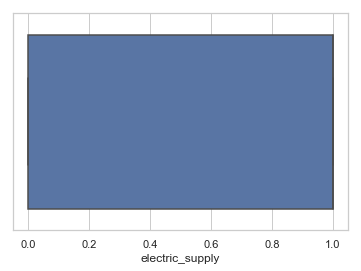

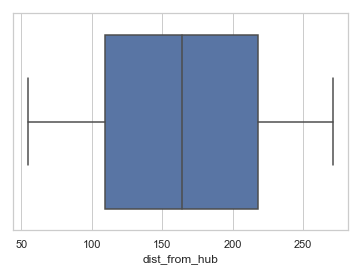

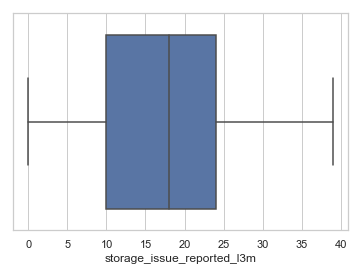

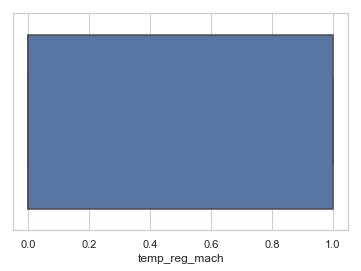

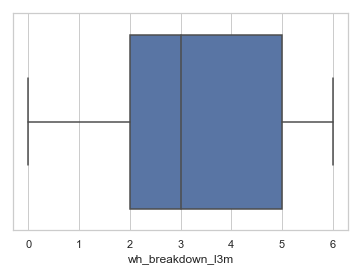

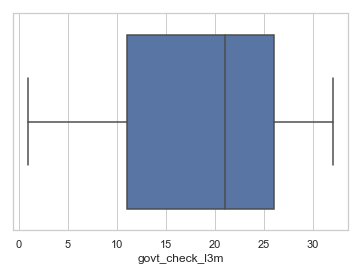

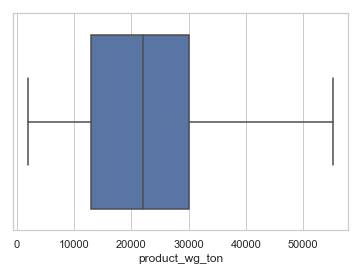

In [18]:
splot_cols=df.columns
for i in splot_cols:
    if df[i].dtype != 'object' and df[i].isnull().values.any() != True:
        sns.boxplot(df[i])
        plt.show()

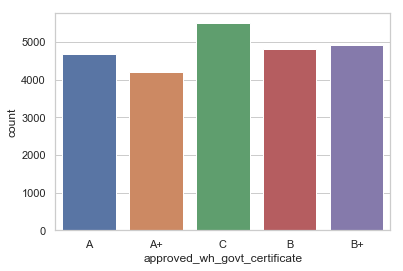

In [19]:
sns.countplot(df['approved_wh_govt_certificate'])

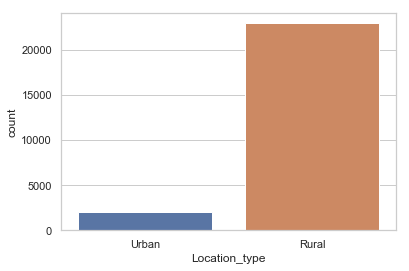

In [20]:
sns.countplot(df['Location_type'])

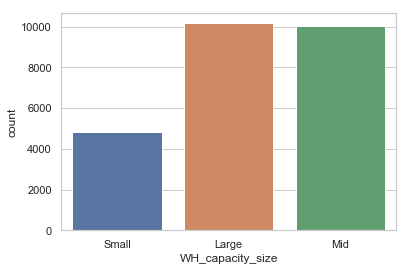

In [21]:
sns.countplot(df['WH_capacity_size'])

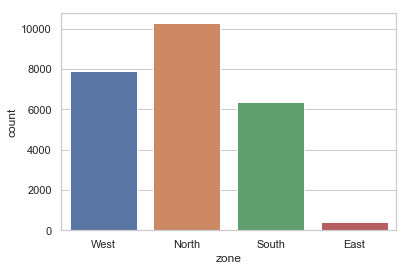

In [22]:
sns.countplot(df['zone'])

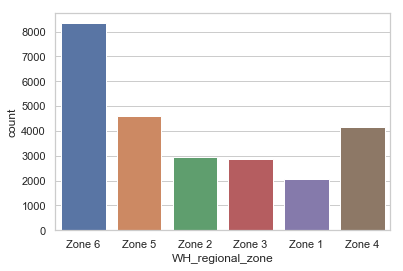

In [23]:
sns.countplot(df['WH_regional_zone'])

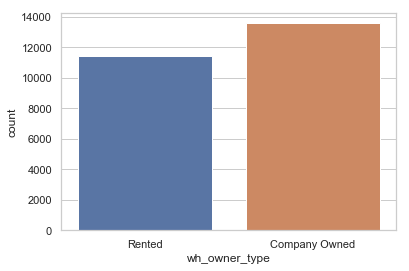

In [24]:
sns.countplot(df['wh_owner_type'])

### Bivariate analysis

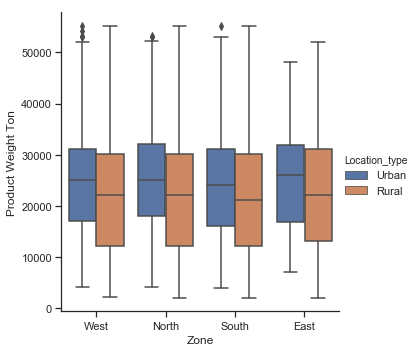

In [25]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("zone", "product_wg_ton", "Location_type", data=df, kind="box")
    g.set_axis_labels("Zone", "Product Weight Ton");

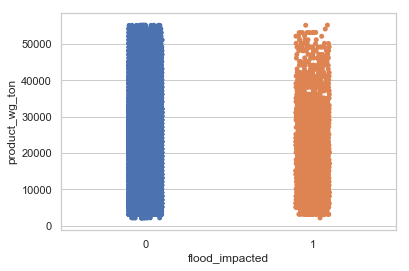

In [26]:
sns.stripplot(x='flood_impacted', y='product_wg_ton', data=df)

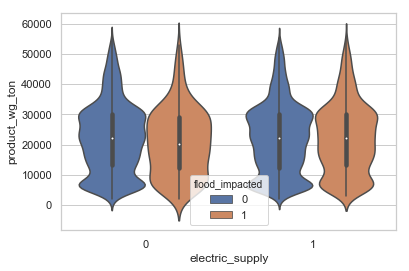

In [27]:
sns.violinplot(x='electric_supply',y='product_wg_ton', hue='flood_impacted', data=df)

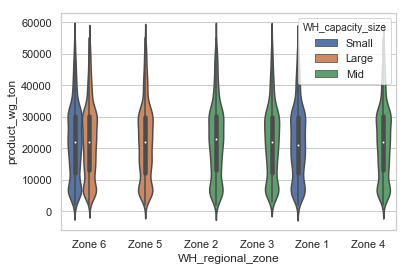

In [28]:
sns.violinplot(x='WH_regional_zone', y='product_wg_ton',hue='WH_capacity_size', data=df)

In [29]:
df.columns

Index(['WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

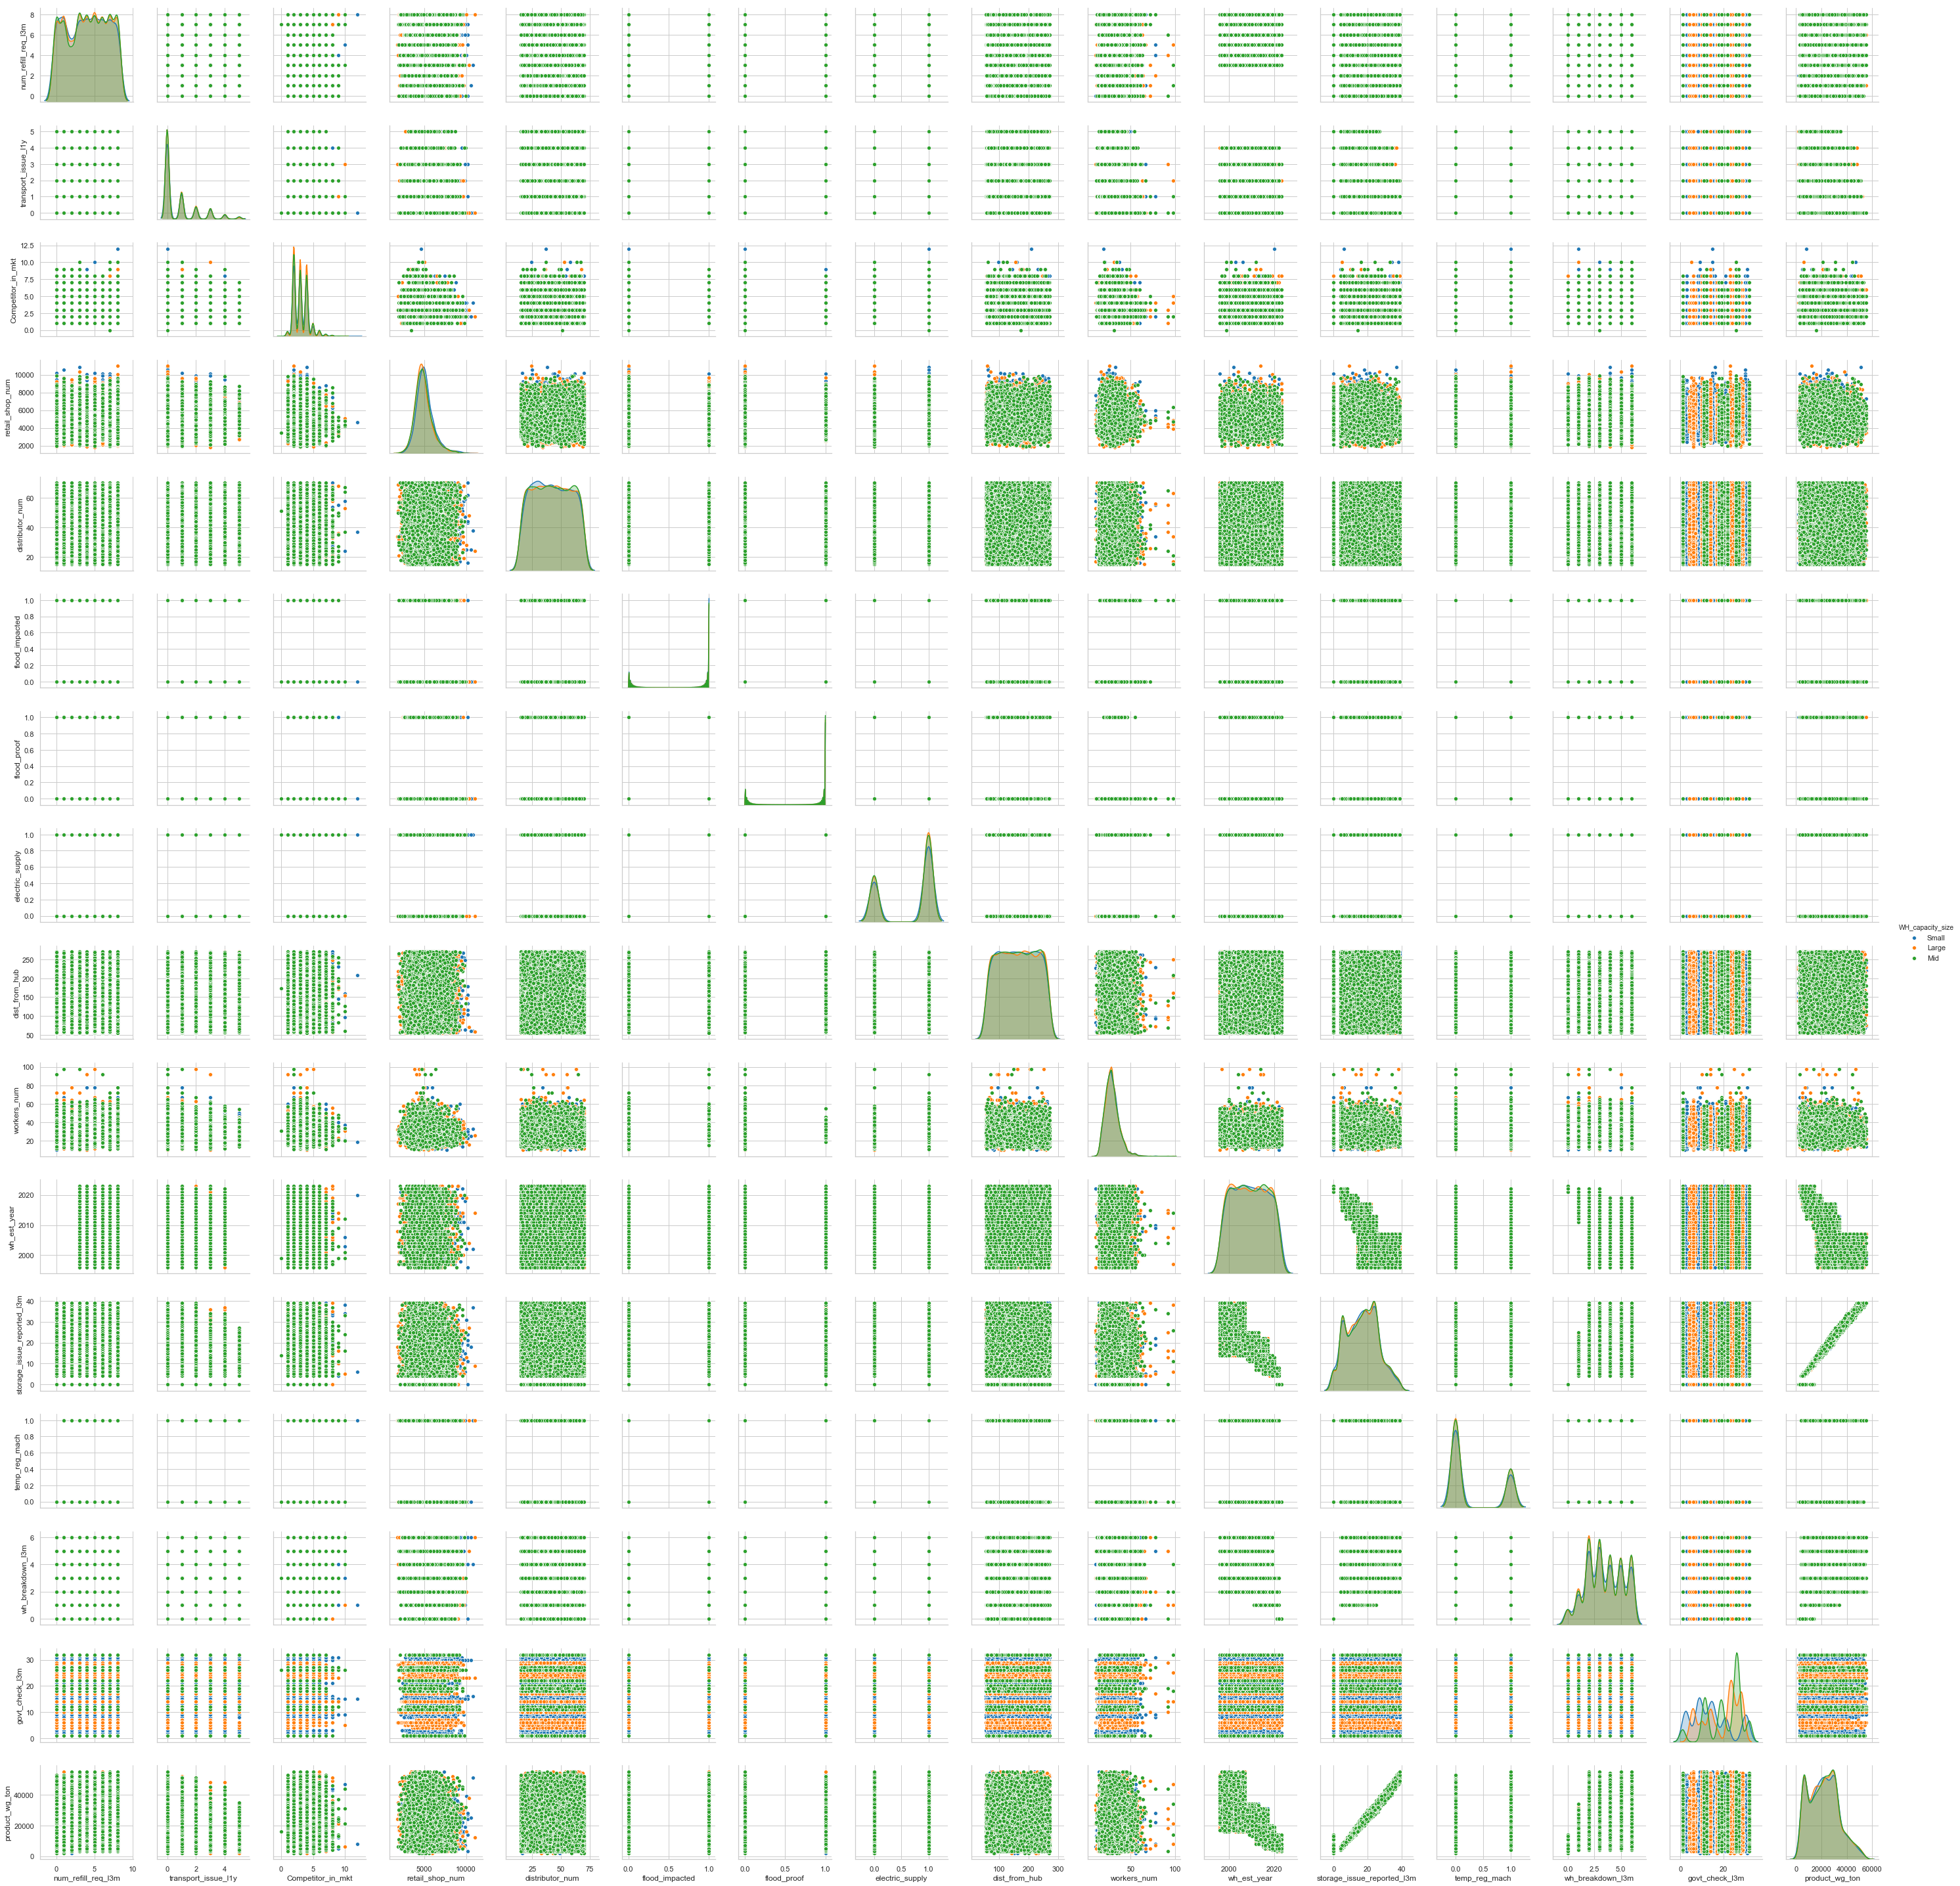

In [30]:
sns.pairplot(df,hue='WH_capacity_size',diag_kind='kde',palette="tab10")

In [31]:
df.corr()

num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                    1.000000             0.018549   
transport_issue_l1y                   0.018549             1.000000   
Competitor_in_mkt                     0.002985            -0.005826   
retail_shop_num                      -0.001186            -0.001826   
distributor_num                       0.003995             0.008993   
flood_impacted                       -0.010548            -0.009596   
flood_proof                          -0.001123             0.000022   
electric_supply                      -0.007959            -0.009299   
dist_from_hub                         0.000048             0.014336   
workers_num                          -0.013764            -0.009004   
wh_est_year                           0.015363            -0.012910   
storage_issue_reported_l3m           -0.006602            -0.144327   
temp_reg_mach                         0.260928             0.018207   
wh_breakdown_l3m                      0.000608             0.012990   
govt_check_l3m                       -0.003302             0.002190   
product_wg_ton                        0.001415            -0.173992   

                            Competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                   0.002985        -0.001186   
transport_issue_l1y                 -0.005826        -0.001826   
Competitor_in_mkt                    1.000000        -0.156943   
retail_shop_num                     -0.156943         1.000000   
distributor_num                     -0.001492        -0.000395   
flood_impacted                       0.009338        -0.003774   
flood_proof                         -0.003444         0.007223   
electric_supply                      0.001759        -0.009207   
dist_from_hub                        0.008407         0.000429   
workers_num                          0.000050        -0.005406   
wh_est_year                         -0.011202         0.005721   
storage_issue_reported_l3m           0.009543        -0.006632   
temp_reg_mach                        0.009524        -0.001273   
wh_breakdown_l3m                     0.012733        -0.008420   
govt_check_l3m                      -0.043455         0.045749   
product_wg_ton                       0.008884        -0.006615   

                            distributor_num  flood_impacted  flood_proof  \
num_refill_req_l3m                 0.003995       -0.010548    -0.001123   
transport_issue_l1y                0.008993       -0.009596     0.000022   
Competitor_in_mkt                 -0.001492        0.009338    -0.003444   
retail_shop_num                   -0.000395       -0.003774     0.007223   
distributor_num                    1.000000        0.004611    -0.003409   
flood_impacted                     0.004611        1.000000     0.107015   
flood_proof                       -0.003409        0.107015     1.000000   
electric_supply                    0.000454        0.164815     0.114811   
dist_from_hub                     -0.011838        0.000749    -0.005315   
workers_num                       -0.014682        0.168425     0.041228   
wh_est_year                       -0.012295       -0.000668    -0.003329   
storage_issue_reported_l3m         0.003396       -0.003157    -0.002712   
temp_reg_mach                      0.002827       -0.008554     0.005636   
wh_breakdown_l3m                   0.004286       -0.001744    -0.005151   
govt_check_l3m                    -0.007934        0.000587    -0.003600   
product_wg_ton                     0.004999       -0.002299    -0.000441   

                            electric_supply  dist_from_hub  workers_num  \
num_refill_req_l3m                -0.007959       0.000048    -0.013764   
transport_issue_l1y               -0.009299       0.014336    -0.009004   
Competitor_in_mkt                  0.001759       0.008407     0.000050   
retail_shop_num                   -0.009207       0.000429    -0.005406   
distributor_num              

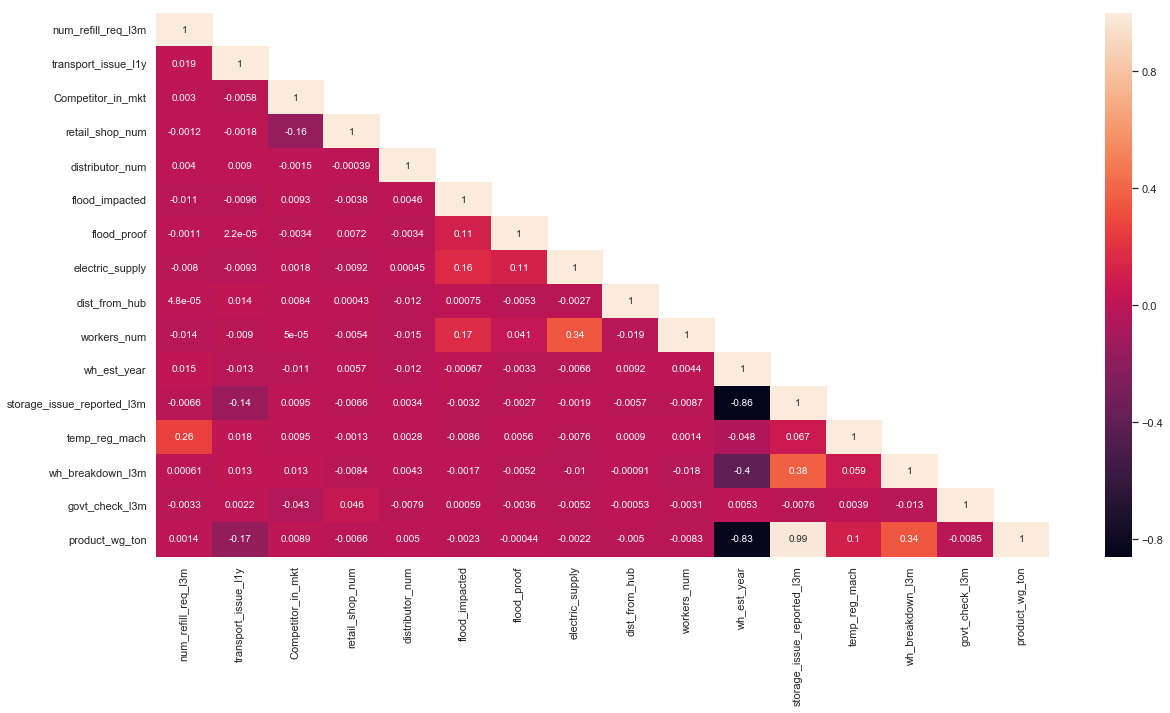

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1))

### Removal of unwanted variables (if applicable)


###### As 'WH_Manager_ID' and 'Ware_house_ID' are unique values, we are dropping 'WH_Manager_ID' and setting 'Ware_house_ID' as an index value.

###### As 'wh_est_year' having 48% of null values, so we are dropping 'wh_est_year' independent variable from the dataframe.

###### 'storage_issue_reported_l3m' independent variable is highly correlated with the target column. So 'storage_issue_reported_l3m' can also be dropped from the dataframe..


In [33]:
df.drop(['WH_Manager_ID','storage_issue_reported_l3m'], axis = 1, inplace = True)

In [34]:
df = df.dropna(axis=0)

In [35]:
df.shape

(12127, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12127 entries, WH_100004 to WH_124999
Data columns (total 21 columns):
Location_type                   12127 non-null object
WH_capacity_size                12127 non-null object
zone                            12127 non-null object
WH_regional_zone                12127 non-null object
num_refill_req_l3m              12127 non-null int64
transport_issue_l1y             12127 non-null int64
Competitor_in_mkt               12127 non-null int64
retail_shop_num                 12127 non-null int64
wh_owner_type                   12127 non-null object
distributor_num                 12127 non-null int64
flood_impacted                  12127 non-null int64
flood_proof                     12127 non-null int64
electric_supply                 12127 non-null int64
dist_from_hub                   12127 non-null int64
workers_num                     12127 non-null float64
wh_est_year                     12127 non-null float64
temp_reg_mach              

### Missing Value treatment (if applicable)

In [37]:
# Missing values count before treating
df.isnull().sum() 

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum() 

mode = df['approved_wh_govt_certificate'].mode()[0]
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(mode)

# Missing values count after treating
df.isnull().sum() 

In [38]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

LOCATION_TYPE :  2
Urban     1087
Rural    11040
Name: Location_type, dtype: int64


WH_CAPACITY_SIZE :  3
Small    2229
Mid      4915
Large    4983
Name: WH_capacity_size, dtype: int64


ZONE :  4
East      212
South    2979
West     3945
North    4991
Name: zone, dtype: int64


WH_REGIONAL_ZONE :  6
Zone 1     947
Zone 3    1399
Zone 2    1434
Zone 4    2082
Zone 5    2220
Zone 6    4045
Name: WH_regional_zone, dtype: int64


WH_OWNER_TYPE :  2
Rented           5523
Company Owned    6604
Name: wh_owner_type, dtype: int64


APPROVED_WH_GOVT_CERTIFICATE :  5
A+    2126
A     2347
B+    2468
B     2489
C     2697
Name: approved_wh_govt_certificate, dtype: int64




### Outlier treatment (if required)

From the boxplot we can infer that, outlier treatment is not required for this dataset.

### Variable transformation (if applicable)

In [39]:
df_cat_train = df.select_dtypes(include = ['object'])
df_num_train = df.select_dtypes(include = ['float64','int64'])

In [40]:
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.shape

(12127, 16)

In [41]:
df_new = pd.concat([df_cat_train,df_num_train],axis=1)
df_new.shape

(12127, 31)

In [42]:
df_new.head()

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                        0                     0   
WH_100005                        0                     0   
WH_100006                        0                     0   
WH_100008                        0                     0   
WH_100010                        0                     0   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                           0           1           0          0   
WH_100005                           1           0           0          1   
WH_100006                           0           0           0          1   
WH_100008                           1           0           1          0   
WH_100010                           0           1           0          0   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                            0                        0   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                            0                        1   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                            0                     0   
WH_100005                            0                     1   
WH_100006                            1                     0   
WH_100008                            1                     1   
WH_100010                            1                     0   

               approved_wh_govt_certificate_A+  \
Ware_house_ID                                    
WH_100004                                    0   
WH_100005                                    1   
WH_100006                                    0   
WH_100008                                    1   
WH_100010                                    0   

               approved_wh_govt_certificate_B  \
Ware_house_ID                                   
WH_100004                                   0   
WH_100005                                   0   
WH_100006                                   1   
WH_100008                                   0   
WH_100010                                   0   

               approved_wh_govt_certificate_B+  \
Ware_house_ID                                    
WH_100004                                    0   
WH_100005                                    0   
WH_100006                                    0   
WH_100008                                    0   
WH_100010                                    1   

               approved_wh_govt_certificate_C  num_refill_req_l3m  \
Ware_house_ID                                                       
WH_100004                                   1                   3   
WH_100005                                   0                   8   
WH_100006                                   0                   8   
WH_100008                                   0                   8   
WH_100010                                   0                   7   

               transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
Ware_house_ID                                                       

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12127 entries, WH_100004 to WH_124999
Data columns (total 31 columns):
Location_type_Urban                12127 non-null uint8
WH_capacity_size_Mid               12127 non-null uint8
WH_capacity_size_Small             12127 non-null uint8
zone_North                         12127 non-null uint8
zone_South                         12127 non-null uint8
zone_West                          12127 non-null uint8
WH_regional_zone_Zone 2            12127 non-null uint8
WH_regional_zone_Zone 3            12127 non-null uint8
WH_regional_zone_Zone 4            12127 non-null uint8
WH_regional_zone_Zone 5            12127 non-null uint8
WH_regional_zone_Zone 6            12127 non-null uint8
wh_owner_type_Rented               12127 non-null uint8
approved_wh_govt_certificate_A+    12127 non-null uint8
approved_wh_govt_certificate_B     12127 non-null uint8
approved_wh_govt_certificate_B+    12127 non-null uint8
approved_wh_govt_certificate_C     12127 non

In [44]:
df_new.describe()

Location_type_Urban  WH_capacity_size_Mid  WH_capacity_size_Small  \
count         12127.000000          12127.000000            12127.000000   
mean              0.089635              0.405294                0.183805   
std               0.285669              0.490969                0.387341   
min               0.000000              0.000000                0.000000   
25%               0.000000              0.000000                0.000000   
50%               0.000000              0.000000                0.000000   
75%               0.000000              1.000000                0.000000   
max               1.000000              1.000000                1.000000   

         zone_North   zone_South     zone_West  WH_regional_zone_Zone 2  \
count  12127.000000  12127.00000  12127.000000             12127.000000   
mean       0.411561      0.24565      0.325307                 0.118249   
std        0.492137      0.43049      0.468509                 0.322915   
min        0.000000      0.00000      0.000000                 0.000000   
25%        0.000000      0.00000      0.000000                 0.000000   
50%        0.000000      0.00000      0.000000                 0.000000   
75%        1.000000      0.00000      1.000000                 0.000000   
max        1.000000      1.00000      1.000000                 1.000000   

       WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
count             12127.000000             12127.000000   
mean                  0.115362                 0.171683   
std                   0.319472                 0.377120   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  wh_owner_type_Rented  \
count             12127.000000             12127.000000           12127.00000   
mean                  0.183063                 0.333553               0.45543   
std                   0.386734                 0.471502               0.49803   
min                   0.000000                 0.000000               0.00000   
25%                   0.000000                 0.000000               0.00000   
50%                   0.000000                 0.000000               0.00000   
75%                   0.000000                 1.000000               1.00000   
max                   1.000000                 1.000000               1.00000   

       approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
count                     12127.000000                    12127.000000   
mean                          0.175311                        0.205244   
std                           0.380249                        0.403897   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           0.000000                        0.000000   
max                           1.000000                        1.000000   

       approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  \
count                     12127.000000                    12127.000000   
mean                          0.203513                        0.222396   
std                           0.402627                        0.415873   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           0.000000                        0.000000   
max                           1.000000                        1.000000   

       num_refill_req_l3m  transport_issue_l1y  Co

In [45]:
from scipy import stats; from scipy.stats import zscore, norm, randint
fitted_value_data, fitted_lambda_value = stats.boxcox(df['product_wg_ton'])

No handles with labels found to put in legend.


Lambda value used for Transformation: 0.6875187911485485


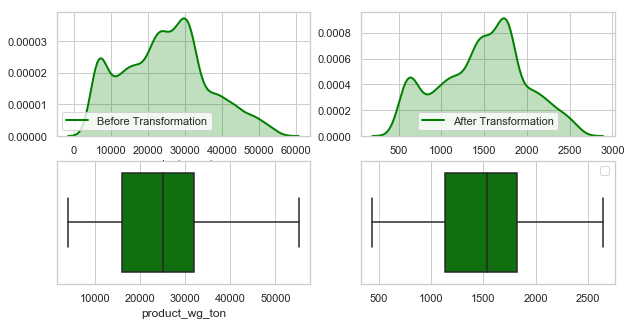

In [46]:
fig, ax = plt.subplots(2, 2)
sns.distplot(df_new['product_wg_ton'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Before Transformation", color ="green", ax = ax[0][0])
 
sns.distplot(fitted_value_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "After Transformation", color ="green", ax = ax[0][1])

sns.boxplot(df_new['product_wg_ton'], color ="green", ax = ax[1][0])
 
sns.boxplot(fitted_value_data, color ="green", ax = ax[1][1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_value}")

In [47]:
df_new.head(10)

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                        0                     0   
WH_100005                        0                     0   
WH_100006                        0                     0   
WH_100008                        0                     0   
WH_100010                        0                     0   
WH_100011                        0                     0   
WH_100012                        1                     1   
WH_100013                        0                     1   
WH_100018                        0                     1   
WH_100020                        0                     1   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                           0           1           0          0   
WH_100005                           1           0           0          1   
WH_100006                           0           0           0          1   
WH_100008                           1           0           1          0   
WH_100010                           0           1           0          0   
WH_100011                           0           1           0          0   
WH_100012                           0           1           0          0   
WH_100013                           0           0           1          0   
WH_100018                           0           1           0          0   
WH_100020                           0           0           1          0   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                            0                        0   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   
WH_100011                            0                        0   
WH_100012                            1                        0   
WH_100013                            0                        0   
WH_100018                            0                        1   
WH_100020                            1                        0   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                            0                        1   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   
WH_100011                            0                        0   
WH_100012                            0                        0   
WH_100013                            1                        0   
WH_100018                            0                        0   
WH_100020                            0                        0   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                            0                     0   
WH_100005                            0                     1   
WH_100006                            1                     0   
WH_100008                            1                     1   
WH_100010                            1                     0   
WH_100011                            1                     1   
WH_100012                            0                     1   
WH_100013                            0                     0   
WH_100018                            0                     1   
WH_100020                            0                     0   

  

In [48]:
df_new['product_wg_ton'] = fitted_value_data
df_new.head(10)

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                        0                     0   
WH_100005                        0                     0   
WH_100006                        0                     0   
WH_100008                        0                     0   
WH_100010                        0                     0   
WH_100011                        0                     0   
WH_100012                        1                     1   
WH_100013                        0                     1   
WH_100018                        0                     1   
WH_100020                        0                     1   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                           0           1           0          0   
WH_100005                           1           0           0          1   
WH_100006                           0           0           0          1   
WH_100008                           1           0           1          0   
WH_100010                           0           1           0          0   
WH_100011                           0           1           0          0   
WH_100012                           0           1           0          0   
WH_100013                           0           0           1          0   
WH_100018                           0           1           0          0   
WH_100020                           0           0           1          0   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                            0                        0   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   
WH_100011                            0                        0   
WH_100012                            1                        0   
WH_100013                            0                        0   
WH_100018                            0                        1   
WH_100020                            1                        0   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                            0                        1   
WH_100005                            0                        0   
WH_100006                            0                        0   
WH_100008                            0                        0   
WH_100010                            0                        0   
WH_100011                            0                        0   
WH_100012                            0                        0   
WH_100013                            1                        0   
WH_100018                            0                        0   
WH_100020                            0                        0   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                            0                     0   
WH_100005                            0                     1   
WH_100006                            1                     0   
WH_100008                            1                     1   
WH_100010                            1                     0   
WH_100011                            1                     1   
WH_100012                            0                     1   
WH_100013                            0                     0   
WH_100018                            0                     1   
WH_100020                            0                     0   

  

In [49]:
# Finding Skewness

df_new.skew()

Location_type_Urban                2.873482
WH_capacity_size_Mid               0.385856
WH_capacity_size_Small             1.632915
zone_North                         0.359468
zone_South                         1.181871
zone_West                          0.745863
WH_regional_zone_Zone 2            2.364795
WH_regional_zone_Zone 3            2.408355
WH_regional_zone_Zone 4            1.741466
WH_regional_zone_Zone 5            1.639317
WH_regional_zone_Zone 6            0.706145
wh_owner_type_Rented               0.179015
approved_wh_govt_certificate_A+    1.708051
approved_wh_govt_certificate_B     1.459799
approved_wh_govt_certificate_B+    1.473005
approved_wh_govt_certificate_C     1.335261
num_refill_req_l3m                 0.006391
transport_issue_l1y                2.370135
Competitor_in_mkt                  1.022401
retail_shop_num                    0.945655
distributor_num                    0.011753
flood_impacted                     2.852410
flood_proof                     

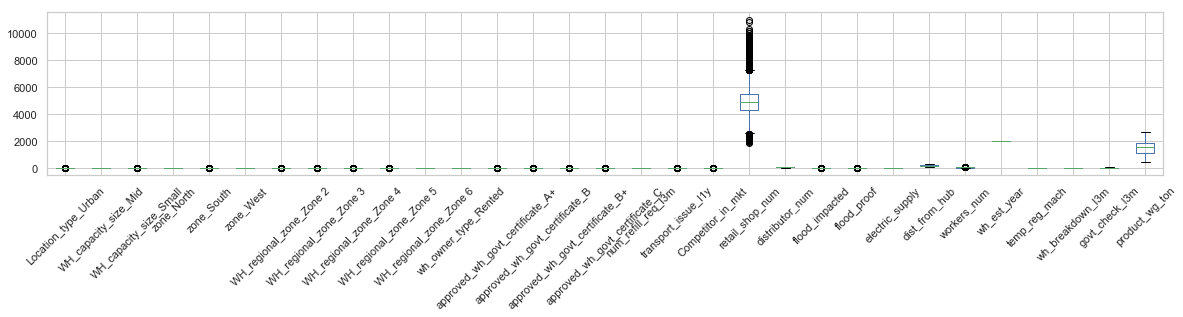

In [50]:
df_new.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

### Addition of new variables (if required)

Addition of new variables is not required in the dataset.

### 4) Business insights from EDA 

###### a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

If the data is unbalanced, we can use Smote-R and Smote-R Gaussian for treating the unbalanced data.

###### b) Any business insights using clustering  (if applicable)

In [51]:
#Scale the data
from scipy.stats import zscore
df_scaled = df_new.apply(zscore)

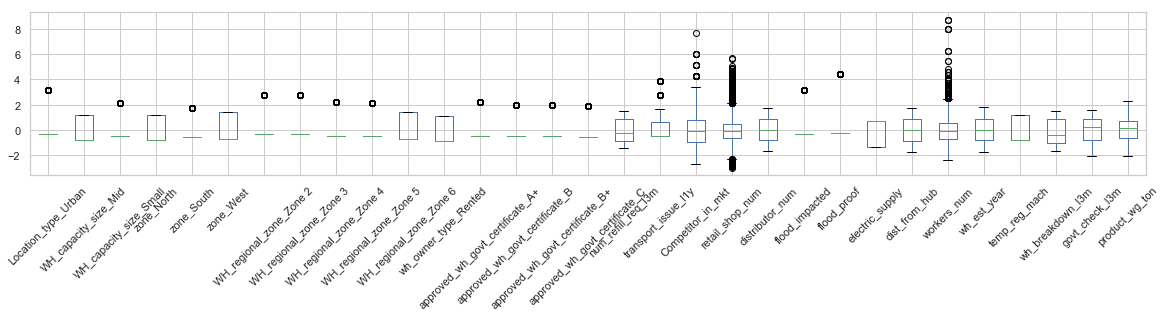

In [52]:
#Check for presence of outliers in each feature
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [54]:
wardlink = linkage(df_scaled, method = 'ward')

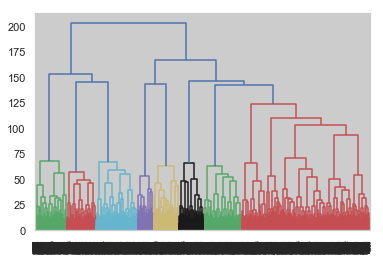

In [55]:
dend = dendrogram(wardlink)

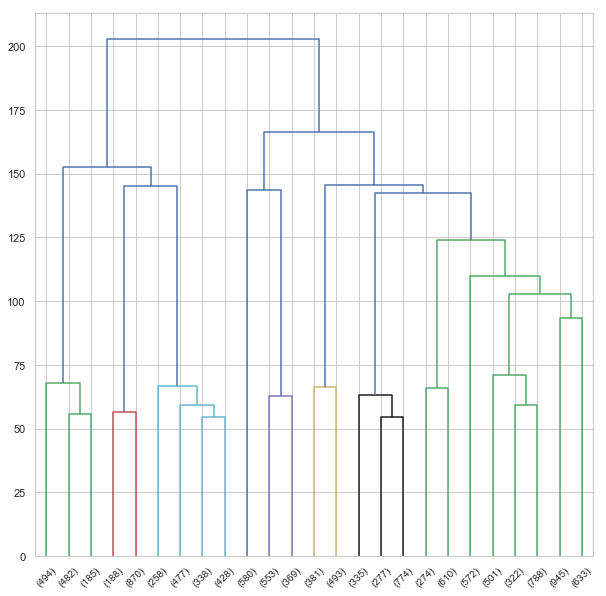

In [56]:
fig = plt.subplots(figsize=(10, 10))
dend=dendrogram(wardlink,truncate_mode='lastp',p=25)

In [57]:
from scipy.cluster.hierarchy import fcluster
clusters_distance = fcluster(wardlink, 20, criterion='distance')
clusters_distance

array([ 67, 120, 158, ..., 134,   1,  63], dtype=int32)

In [58]:
# df_scaled['clusters_maxclust']=clusters_maxclust
df_scaled['clusters_distance']=clusters_distance

In [59]:
df_scaled.head()

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                -0.313784             -0.825532   
WH_100005                -0.313784             -0.825532   
WH_100006                -0.313784             -0.825532   
WH_100008                -0.313784             -0.825532   
WH_100010                -0.313784             -0.825532   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                   -0.474549    1.195731   -0.570653  -0.694375   
WH_100005                    2.107263   -0.836308   -0.570653   1.440145   
WH_100006                   -0.474549   -0.836308   -0.570653   1.440145   
WH_100008                    2.107263   -0.836308    1.752378  -0.694375   
WH_100010                   -0.474549    1.195731   -0.570653  -0.694375   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                    -0.366205                -0.361118   
WH_100005                    -0.366205                -0.361118   
WH_100006                    -0.366205                -0.361118   
WH_100008                    -0.366205                -0.361118   
WH_100010                    -0.366205                -0.361118   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                    -0.455266                 2.112490   
WH_100005                    -0.455266                -0.473375   
WH_100006                    -0.455266                -0.473375   
WH_100008                    -0.455266                -0.473375   
WH_100010                    -0.455266                -0.473375   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                    -0.707457             -0.914501   
WH_100005                    -0.707457              1.093493   
WH_100006                     1.413514             -0.914501   
WH_100008                     1.413514              1.093493   
WH_100010                     1.413514             -0.914501   

               approved_wh_govt_certificate_A+  \
Ware_house_ID                                    
WH_100004                            -0.461063   
WH_100005                             2.168903   
WH_100006                            -0.461063   
WH_100008                             2.168903   
WH_100010                            -0.461063   

               approved_wh_govt_certificate_B  \
Ware_house_ID                                   
WH_100004                           -0.508182   
WH_100005                           -0.508182   
WH_100006                            1.967800   
WH_100008                           -0.508182   
WH_100010                           -0.508182   

               approved_wh_govt_certificate_B+  \
Ware_house_ID                                    
WH_100004                            -0.505483   
WH_100005                            -0.505483   
WH_100006                            -0.505483   
WH_100008                            -0.505483   
WH_100010                             1.978306   

               approved_wh_govt_certificate_C  num_refill_req_l3m  \
Ware_house_ID                                                       
WH_100004                            1.869887           -1.448472   
WH_100005                           -0.534792            1.458492   
WH_100006                           -0.534792            1.458492   
WH_100008                           -0.534792            1.458492   
WH_100010                           -0.534792            0.877099   

               transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
Ware_house_ID                                                       

In [60]:
df_scaled['clusters_distance'].value_counts().sort_index()

1       48
2       77
3       54
4       33
5       43
6       63
7       94
8       82
9       58
10      91
11      73
12      92
13      87
14      81
15      91
16      94
17      61
18      59
19      68
20      63
21      46
22      80
23      49
24      48
25      65
26      89
27     121
28      76
29      41
30      66
31      58
32      68
33     130
34      55
35      73
36      64
37      59
38      61
39      98
40      81
41     114
42      84
43      62
44      38
45     154
46      64
47      91
48      49
49      59
50      72
51      93
52      68
53      24
54      44
55      31
56      32
57      32
58      28
59      71
60      81
61      65
62      31
63      73
64      10
65      48
66      25
67      62
68      35
69      26
70      81
71      73
72      72
73      49
74      72
75      75
76      21
77      26
78      57
79      86
80      46
81      58
82      40
83      72
84      57
85      48
86      51
87      33
88      80
89      36
90     138
91      91

The cluster grouping linkage based on the dendrogram, 3 or 4 looks good. The further analysis, and based on the dataset had gone for 3 linkage solution based on the hierarchical clustering. From hierarchial clustering we can find there are 7 clusters identified for the data.

In K-means clustering, the inertia is calculated, from that finding plotting the elbow curve and finding the clusters from the elbow curve

In [61]:
from sklearn.cluster import KMeans
wss =[]
for i in range(1,25):
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

[30043845.021604683,
 7210570.540984774,
 3275519.275640799,
 2041565.2547120946,
 1433592.6945027888,
 1089912.8106700317,
 860824.1094583707,
 728399.6679705142,
 634656.1931454822,
 570295.0913699059,
 512141.2756657508,
 477984.5892084818,
 446173.4000552754,
 418909.57962021924,
 395241.3755396279,
 378110.7918987149,
 358058.60013522074,
 347967.65129923756,
 336909.05915682856,
 328190.1984162085,
 319928.95009568834,
 312569.32847257477,
 307076.92272766255,
 297383.6139385797]

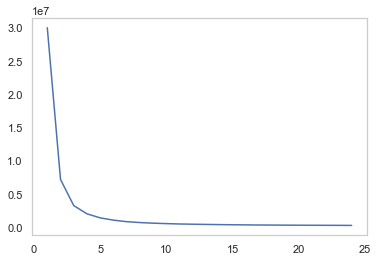

In [62]:
plt.plot(range(1,25), wss)
plt.grid()
plt.show()

In [63]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([3, 0, 2, ..., 2, 1, 3])

In [64]:
df_scaled["Clus_kmeans"] = labels
df_scaled.head(5)

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                -0.313784             -0.825532   
WH_100005                -0.313784             -0.825532   
WH_100006                -0.313784             -0.825532   
WH_100008                -0.313784             -0.825532   
WH_100010                -0.313784             -0.825532   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                   -0.474549    1.195731   -0.570653  -0.694375   
WH_100005                    2.107263   -0.836308   -0.570653   1.440145   
WH_100006                   -0.474549   -0.836308   -0.570653   1.440145   
WH_100008                    2.107263   -0.836308    1.752378  -0.694375   
WH_100010                   -0.474549    1.195731   -0.570653  -0.694375   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                    -0.366205                -0.361118   
WH_100005                    -0.366205                -0.361118   
WH_100006                    -0.366205                -0.361118   
WH_100008                    -0.366205                -0.361118   
WH_100010                    -0.366205                -0.361118   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                    -0.455266                 2.112490   
WH_100005                    -0.455266                -0.473375   
WH_100006                    -0.455266                -0.473375   
WH_100008                    -0.455266                -0.473375   
WH_100010                    -0.455266                -0.473375   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                    -0.707457             -0.914501   
WH_100005                    -0.707457              1.093493   
WH_100006                     1.413514             -0.914501   
WH_100008                     1.413514              1.093493   
WH_100010                     1.413514             -0.914501   

               approved_wh_govt_certificate_A+  \
Ware_house_ID                                    
WH_100004                            -0.461063   
WH_100005                             2.168903   
WH_100006                            -0.461063   
WH_100008                             2.168903   
WH_100010                            -0.461063   

               approved_wh_govt_certificate_B  \
Ware_house_ID                                   
WH_100004                           -0.508182   
WH_100005                           -0.508182   
WH_100006                            1.967800   
WH_100008                           -0.508182   
WH_100010                           -0.508182   

               approved_wh_govt_certificate_B+  \
Ware_house_ID                                    
WH_100004                            -0.505483   
WH_100005                            -0.505483   
WH_100006                            -0.505483   
WH_100008                            -0.505483   
WH_100010                             1.978306   

               approved_wh_govt_certificate_C  num_refill_req_l3m  \
Ware_house_ID                                                       
WH_100004                            1.869887           -1.448472   
WH_100005                           -0.534792            1.458492   
WH_100006                           -0.534792            1.458492   
WH_100008                           -0.534792            1.458492   
WH_100010                           -0.534792            0.877099   

               transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
Ware_house_ID                                                       

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_scaled,labels)

0.5357983260254907

In [66]:
sil_width = silhouette_samples(df_scaled,labels)
sil_width

array([0.56771185, 0.34727962, 0.7215899 , ..., 0.45880005, 0.64325514,
       0.62827513])

In [67]:
df_scaled["sil_width"] = sil_width
df_scaled.head(5)


Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                -0.313784             -0.825532   
WH_100005                -0.313784             -0.825532   
WH_100006                -0.313784             -0.825532   
WH_100008                -0.313784             -0.825532   
WH_100010                -0.313784             -0.825532   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                   -0.474549    1.195731   -0.570653  -0.694375   
WH_100005                    2.107263   -0.836308   -0.570653   1.440145   
WH_100006                   -0.474549   -0.836308   -0.570653   1.440145   
WH_100008                    2.107263   -0.836308    1.752378  -0.694375   
WH_100010                   -0.474549    1.195731   -0.570653  -0.694375   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                    -0.366205                -0.361118   
WH_100005                    -0.366205                -0.361118   
WH_100006                    -0.366205                -0.361118   
WH_100008                    -0.366205                -0.361118   
WH_100010                    -0.366205                -0.361118   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                    -0.455266                 2.112490   
WH_100005                    -0.455266                -0.473375   
WH_100006                    -0.455266                -0.473375   
WH_100008                    -0.455266                -0.473375   
WH_100010                    -0.455266                -0.473375   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                    -0.707457             -0.914501   
WH_100005                    -0.707457              1.093493   
WH_100006                     1.413514             -0.914501   
WH_100008                     1.413514              1.093493   
WH_100010                     1.413514             -0.914501   

               approved_wh_govt_certificate_A+  \
Ware_house_ID                                    
WH_100004                            -0.461063   
WH_100005                             2.168903   
WH_100006                            -0.461063   
WH_100008                             2.168903   
WH_100010                            -0.461063   

               approved_wh_govt_certificate_B  \
Ware_house_ID                                   
WH_100004                           -0.508182   
WH_100005                           -0.508182   
WH_100006                            1.967800   
WH_100008                           -0.508182   
WH_100010                           -0.508182   

               approved_wh_govt_certificate_B+  \
Ware_house_ID                                    
WH_100004                            -0.505483   
WH_100005                            -0.505483   
WH_100006                            -0.505483   
WH_100008                            -0.505483   
WH_100010                             1.978306   

               approved_wh_govt_certificate_C  num_refill_req_l3m  \
Ware_house_ID                                                       
WH_100004                            1.869887           -1.448472   
WH_100005                           -0.534792            1.458492   
WH_100006                           -0.534792            1.458492   
WH_100008                           -0.534792            1.458492   
WH_100010                           -0.534792            0.877099   

               transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
Ware_house_ID                                                       

In [68]:
silhouette_samples(df_scaled,labels).min()

0.02148690918912179

In [69]:
df_scaled.drop(['clusters_distance','Clus_kmeans','sil_width'],axis=1,inplace=True)

In [70]:
df_scaled.head()

Location_type_Urban  WH_capacity_size_Mid  \
Ware_house_ID                                              
WH_100004                -0.313784             -0.825532   
WH_100005                -0.313784             -0.825532   
WH_100006                -0.313784             -0.825532   
WH_100008                -0.313784             -0.825532   
WH_100010                -0.313784             -0.825532   

               WH_capacity_size_Small  zone_North  zone_South  zone_West  \
Ware_house_ID                                                              
WH_100004                   -0.474549    1.195731   -0.570653  -0.694375   
WH_100005                    2.107263   -0.836308   -0.570653   1.440145   
WH_100006                   -0.474549   -0.836308   -0.570653   1.440145   
WH_100008                    2.107263   -0.836308    1.752378  -0.694375   
WH_100010                   -0.474549    1.195731   -0.570653  -0.694375   

               WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
Ware_house_ID                                                     
WH_100004                    -0.366205                -0.361118   
WH_100005                    -0.366205                -0.361118   
WH_100006                    -0.366205                -0.361118   
WH_100008                    -0.366205                -0.361118   
WH_100010                    -0.366205                -0.361118   

               WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
Ware_house_ID                                                     
WH_100004                    -0.455266                 2.112490   
WH_100005                    -0.455266                -0.473375   
WH_100006                    -0.455266                -0.473375   
WH_100008                    -0.455266                -0.473375   
WH_100010                    -0.455266                -0.473375   

               WH_regional_zone_Zone 6  wh_owner_type_Rented  \
Ware_house_ID                                                  
WH_100004                    -0.707457             -0.914501   
WH_100005                    -0.707457              1.093493   
WH_100006                     1.413514             -0.914501   
WH_100008                     1.413514              1.093493   
WH_100010                     1.413514             -0.914501   

               approved_wh_govt_certificate_A+  \
Ware_house_ID                                    
WH_100004                            -0.461063   
WH_100005                             2.168903   
WH_100006                            -0.461063   
WH_100008                             2.168903   
WH_100010                            -0.461063   

               approved_wh_govt_certificate_B  \
Ware_house_ID                                   
WH_100004                           -0.508182   
WH_100005                           -0.508182   
WH_100006                            1.967800   
WH_100008                           -0.508182   
WH_100010                           -0.508182   

               approved_wh_govt_certificate_B+  \
Ware_house_ID                                    
WH_100004                            -0.505483   
WH_100005                            -0.505483   
WH_100006                            -0.505483   
WH_100008                            -0.505483   
WH_100010                             1.978306   

               approved_wh_govt_certificate_C  num_refill_req_l3m  \
Ware_house_ID                                                       
WH_100004                            1.869887           -1.448472   
WH_100005                           -0.534792            1.458492   
WH_100006                           -0.534792            1.458492   
WH_100008                           -0.534792            1.458492   
WH_100010                           -0.534792            0.877099   

               transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
Ware_house_ID                                                       

# Notes - 2

### 1). Model building and interpretation.
##### a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)
##### b. Test your predictive model against the test set using various appropriate performance metrics
##### c.Interpretation of the model(s)

##### Linear Regression

In [71]:
x = df_scaled.drop('product_wg_ton', axis=1)

y = df_scaled[['product_wg_ton']]
x.head()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression(n_jobs=-1)
LR_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[0][idx]))

The coefficient for Location_type_Urban is 0.004857221970870952
The coefficient for WH_capacity_size_Mid is 493823367161.7042
The coefficient for WH_capacity_size_Small is 0.0058746337890625
The coefficient for zone_North is -0.01650238037109375
The coefficient for zone_South is -0.01721954345703125
The coefficient for zone_West is -0.01885223388671875
The coefficient for WH_regional_zone_Zone 2 is -324792786634.22253
The coefficient for WH_regional_zone_Zone 3 is -321329246743.3435
The coefficient for WH_regional_zone_Zone 4 is -379312669954.88965
The coefficient for WH_regional_zone_Zone 5 is 0.000148773193359375
The coefficient for WH_regional_zone_Zone 6 is -0.0065860748291015625
The coefficient for wh_owner_type_Rented is -0.00279998779296875
The coefficient for approved_wh_govt_certificate_A+ is 0.0558013916015625
The coefficient for approved_wh_govt_certificate_B is -0.09619903564453125
The coefficient for approved_wh_govt_certificate_B+ is -0.068817138671875
The coefficient for

In [73]:
LR_intercept = LR_model.intercept_[0]

print("The intercept for our model is {}".format(LR_intercept))

The intercept for our model is -0.003970567491901604


In [74]:
# R square on training data
print("R square value for training data ",LR_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",LR_model.score(x_test, y_test))
LR_model_Rsquare_value = LR_model.score(x_test, y_test)
LR_model_Rsquare_value_train = LR_model.score(x_train, y_train)

R square value for training data  0.7118386048078633
R square value for testing data  0.714877121097013


In [75]:
#RMSE on Training data
LR_predicted_train=LR_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,LR_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,LR_predicted_train)))


#RMSE on Testing data
LR_predicted_test=LR_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,LR_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,LR_predicted_test)))


LR_model_MSE = metrics.mean_squared_error(y_test,LR_predicted_test)
LR_model_RMSE = np.sqrt(metrics.mean_squared_error(y_test,LR_predicted_test))

Mean squared error for the training data is  0.2872543665453595
Root Mean squared error for the training data is  0.5359611614150409
Mean squared error for the testing data is  0.28867053748632443
Root Mean squared error for the testing data is  0.5372806878032417


In [76]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, LR_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_predicted_test))

LR_model_MAE_score = metrics.mean_absolute_error(y_test, LR_predicted_test)

Mean Absolute Error: 0.42487545771468194
Mean Absolute Error: 0.42229603087784606


In [77]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, LR_predicted_test))

LR_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, LR_predicted_test)

Mean Absolute Percentage Error: 1.2808468445617915


In [78]:
# accuracy for test scaled data
LR_accuracy = (1 - (LR_model_RMSE/y.mean()))
LR_accuracy

product_wg_ton    5.972658e+15
dtype: float64

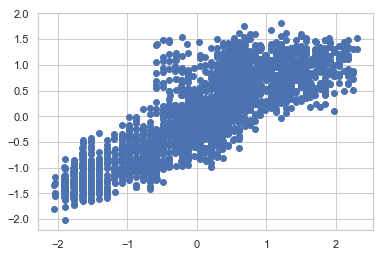

In [79]:
plt.scatter(y_test,LR_predicted_test)
plt.show()

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 
def vif_calculation(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
vif_calculation(x).sort_values(by = 'VIF', ascending = False)

variable        VIF
1              WH_capacity_size_Mid        inf
6           WH_regional_zone_Zone 2        inf
7           WH_regional_zone_Zone 3        inf
8           WH_regional_zone_Zone 4        inf
3                        zone_North  15.848109
5                         zone_West  13.973929
4                        zone_South  12.742189
9           WH_regional_zone_Zone 5   5.352549
10          WH_regional_zone_Zone 6   5.289437
2            WH_capacity_size_Small   2.501654
12  approved_wh_govt_certificate_A+   2.051842
15   approved_wh_govt_certificate_C   1.695401
13   approved_wh_govt_certificate_B   1.643224
14  approved_wh_govt_certificate_B+   1.639182
27                    temp_reg_mach   1.453754
29                   govt_check_l3m   1.330209
18                Competitor_in_mkt   1.270040
23                  electric_supply   1.205380
25                      workers_num   1.170532
26                      wh_est_year   1.126449
28                 wh_breakdown_l3m   1.113680
11             wh_owner_type_Rented   1.086171
21                   flood_impacted   1.064008
19                  retail_shop_num   1.046730
22                      flood_proof   1.024910
0               Location_type_Urban   1.007008
17              transport_issue_l1y   1.004083
20                  distributor_num   1.002376
24                    dist_from_hub   1.001870
16               num_refill_req_l3m   1.001593

In [81]:
resultsDf = pd.DataFrame({'intercept':LR_intercept,'Rsquare value train':LR_model_Rsquare_value_train,'R Square value':LR_model_Rsquare_value,'RMSE':LR_model_RMSE,'MAE':LR_model_MAE_score,'MAPE':LR_model_MAPE_score,"MSE":LR_model_MSE},index=['Linear Regression'])
resultsDf

intercept  Rsquare value train  R Square value      RMSE  \
Linear Regression  -0.003971             0.711839        0.714877  0.537281   

                        MAE      MAPE       MSE  
Linear Regression  0.422296  1.280847  0.288671

### Lasso Regression

In [82]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True,alpha=50,max_iter=10, tol=0.01)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=10, normalize=True, tol=0.01)

In [83]:
lasso_reg_intercept = lasso_reg.intercept_[0]

print("The intercept for our model is {}".format(lasso_reg_intercept))

The intercept for our model is -0.0026850697608671275


In [84]:
# R square on training data
print("R square value for training data ",lasso_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",lasso_reg.score(x_test, y_test))
lasso_reg_model_Rsquare_value_train = lasso_reg.score(x_train, y_train)
lasso_reg_model_Rsquare_value = lasso_reg.score(x_test, y_test)

R square value for training data  0.0
R square value for testing data  -0.00017793685732647724


In [85]:
#RMSE on Training data
lasso_reg_predicted_train=lasso_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,lasso_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,lasso_reg_predicted_train)))

#RMSE on Testing data
lasso_reg_predicted_test=lasso_reg.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,lasso_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,lasso_reg_predicted_test)))

lasso_reg_model_MSE= (metrics.mean_squared_error(y_test,lasso_reg_predicted_test))
lasso_reg_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,lasso_reg_predicted_test))

Mean squared error for the training data is  0.9968523589144468
Root Mean squared error for the training data is  0.9984249390487233
Mean squared error for the testing data is  1.012622711041035
Root Mean squared error for the testing data is  1.006291563634037


In [86]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lasso_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_reg_predicted_test))

lasso_reg_model_MAE_score = metrics.mean_absolute_error(y_test, lasso_reg_predicted_test)

Mean Absolute Error: 0.8148039328406328
Mean Absolute Error: 0.8172401884490822


In [87]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, lasso_reg_predicted_test))

lasso_reg_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, lasso_reg_predicted_test)

Mean Absolute Percentage Error: 1.000786739973883


In [88]:
# accuracy for test scaled data
lasso_reg_accuracy = (1 - (lasso_reg_model_RMSE/y.mean()))
lasso_reg_accuracy

product_wg_ton    1.118640e+16
dtype: float64

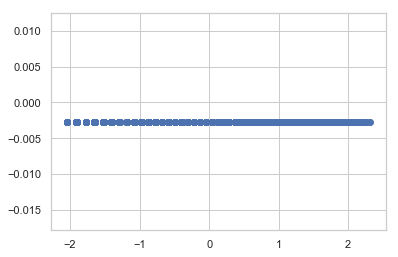

In [89]:
plt.scatter(y_test,lasso_reg_predicted_test)
plt.show()

In [90]:
resultsDf1 = pd.DataFrame({'intercept':lasso_reg_intercept,'R Square value train':lasso_reg_model_Rsquare_value_train,'R Square value':lasso_reg_model_Rsquare_value,'RMSE':lasso_reg_model_RMSE,'MSE':lasso_reg_model_MSE,'MAE':lasso_reg_model_MAE_score,'MAPE':lasso_reg_model_MAPE_score},index=['Lasso Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
Lasso Regression   0.817240  1.000787  1.012623       -0.000178   
Linear Regression  0.422296  1.280847  0.288671        0.714877   

                   R Square value train      RMSE  Rsquare value train  \
Lasso Regression                    0.0  1.006292                  NaN   
Linear Regression                   NaN  0.537281             0.711839   

                   intercept  
Lasso Regression   -0.002685  
Linear Regression  -0.003971

### Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0, fit_intercept=True, normalize=False, max_iter=100, tol=0.01, solver='auto')
ridge_reg.fit(x_train, y_train)

Ridge(max_iter=100, normalize=False, tol=0.01)

In [92]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_reg.coef_[0][idx]))

The coefficient for Location_type_Urban is 0.00507021561182122
The coefficient for WH_capacity_size_Mid is 0.0017781995699379652
The coefficient for WH_capacity_size_Small is 0.005785783265605081
The coefficient for zone_North is -0.015781865446415997
The coefficient for zone_South is -0.016284539028026537
The coefficient for zone_West is -0.01813959626401465
The coefficient for WH_regional_zone_Zone 2 is 0.007145745099485438
The coefficient for WH_regional_zone_Zone 3 is -0.005012316636441613
The coefficient for WH_regional_zone_Zone 4 is 0.0004424686495090294
The coefficient for WH_regional_zone_Zone 5 is 1.6606572405043086e-05
The coefficient for WH_regional_zone_Zone 6 is -0.00677993189471427
The coefficient for wh_owner_type_Rented is -0.0029001551212726674
The coefficient for approved_wh_govt_certificate_A+ is 0.05588475487869215
The coefficient for approved_wh_govt_certificate_B is -0.09621239464626737
The coefficient for approved_wh_govt_certificate_B+ is -0.06876041112121187
T

In [93]:
ridge_reg_intercept = ridge_reg.intercept_[0]

print("The intercept for our model is {}".format(ridge_reg_intercept))

The intercept for our model is -0.003992307763578291


In [94]:
# R square on training data
print("R square value for training data ",ridge_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ridge_reg.score(x_test, y_test))
ridge_reg_model_Rsquare_value_train = ridge_reg.score(x_train, y_train)
ridge_reg_model_Rsquare_value = ridge_reg.score(x_test, y_test)

R square value for training data  0.711847613122121
R square value for testing data  0.7148699089758972


In [95]:
#RMSE on Training data
ridge_reg_predicted_train=ridge_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))

#RMSE on Testing data
ridge_reg_predicted_test=ridge_reg.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))

ridge_reg_model_MSE= (metrics.mean_squared_error(y_test,ridge_reg_predicted_test))
ridge_reg_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test))

Mean squared error for the training data is  0.2872453865860421
Root Mean squared error for the training data is  0.5359527839148166
Mean squared error for the testing data is  0.28867783934469127
Root Mean squared error for the testing data is  0.5372874829592545


In [96]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAE_score = metrics.mean_absolute_error(y_test, ridge_reg_predicted_test)

Mean Absolute Error: 0.4248486156699593
Mean Absolute Error: 0.42229860146984727


In [97]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test)

Mean Absolute Percentage Error: 1.2802969374702606


In [98]:
# accuracy for test scaled data
ridge_reg_accuracy = (1 - (ridge_reg_model_RMSE/y.mean()))
ridge_reg_accuracy

product_wg_ton    5.972733e+15
dtype: float64

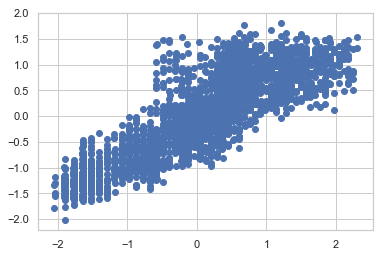

In [99]:
plt.scatter(y_test,ridge_reg_predicted_test)
plt.show()

In [100]:
resultsDf1 = pd.DataFrame({'intercept':ridge_reg_intercept,'R Square value train':ridge_reg_model_Rsquare_value_train,'R Square value':ridge_reg_model_Rsquare_value,'RMSE':ridge_reg_model_RMSE,'MSE':ridge_reg_model_MSE,'MAE':ridge_reg_model_MAE_score,'MAPE':ridge_reg_model_MAPE_score},index=['Ridge Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
Ridge Regression   0.422299  1.280297  0.288678        0.714870   
Lasso Regression   0.817240  1.000787  1.012623       -0.000178   
Linear Regression  0.422296  1.280847  0.288671        0.714877   

                   R Square value train      RMSE  Rsquare value train  \
Ridge Regression               0.711848  0.537287                  NaN   
Lasso Regression               0.000000  1.006292                  NaN   
Linear Regression                   NaN  0.537281             0.711839   

                   intercept  
Ridge Regression   -0.003992  
Lasso Regression   -0.002685  
Linear Regression  -0.003971

### Support Vector Model

In [101]:
from sklearn.svm import SVR
sv_model = SVR(kernel='rbf', degree=3, gamma='scale', tol=0.01, max_iter= 10000)
sv_model.fit(x_train,y_train)

SVR(max_iter=10000, tol=0.01)

In [102]:
sv_model_intercept = sv_model.intercept_[0]

print("The intercept for our model is {}".format(sv_model_intercept))

The intercept for our model is -0.5537302314678643


In [103]:
# R square on training data
print("R square value for training data ",sv_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",sv_model.score(x_test, y_test))
sv_model_Rsquare_value_train = sv_model.score(x_train, y_train)
sv_model_Rsquare_value = sv_model.score(x_test, y_test)

R square value for training data  0.8249932343324942
R square value for testing data  0.7165739534574289


In [104]:
#RMSE on Training data
sv_model_predicted_train=sv_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,sv_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,sv_model_predicted_train)))

#RMSE on Testing data
sv_model_predicted_test=sv_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,sv_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,sv_model_predicted_test)))

sv_model_MSE= (metrics.mean_squared_error(y_test,sv_model_predicted_test))
sv_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,sv_model_predicted_test))

Mean squared error for the training data is  0.17445590718164103
Root Mean squared error for the training data is  0.41767919170296364
Mean squared error for the testing data is  0.28695259218712554
Root Mean squared error for the testing data is  0.5356795611063815


In [105]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, sv_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, sv_model_predicted_test))

sv_model_MAE_score = metrics.mean_absolute_error(y_test, sv_model_predicted_test)

Mean Absolute Error: 0.3016912291186414
Mean Absolute Error: 0.42069886955445424


In [106]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, sv_model_predicted_test))

sv_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, sv_model_predicted_test)

Mean Absolute Percentage Error: 1.336387316874556


In [107]:
# accuracy for test scaled data
sv_model_accuracy = (1 - (sv_model_RMSE/y.mean()))
sv_model_accuracy

product_wg_ton    5.954859e+15
dtype: float64

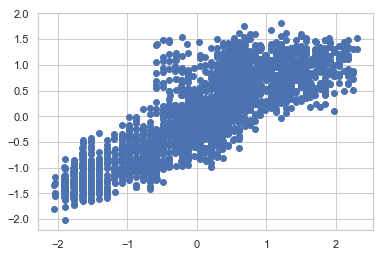

In [108]:
plt.scatter(y_test,LR_predicted_test)
plt.show()

In [109]:
resultsDf1 = pd.DataFrame({'intercept':sv_model_intercept,'R Square value train':sv_model_Rsquare_value_train,'R Square value':sv_model_Rsquare_value,'RMSE':sv_model_RMSE,'MSE':sv_model_MSE,'MAE':sv_model_MAE_score,'MAPE':sv_model_MAPE_score},index=['Support Vector Model Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   
Linear Regression                0.422296  1.280847  0.288671        0.714877   

                                 R Square value train      RMSE  \
Support Vector Model Regression              0.824993  0.535680   
Ridge Regression                             0.711848  0.537287   
Lasso Regression                             0.000000  1.006292   
Linear Regression                                 NaN  0.537281   

                                 Rsquare value train  intercept  
Support Vector Model Regression                  NaN  -0.553730  
Ridge Regression                                 NaN  -0.003992  
Lasso Regression                                 NaN  -0.002685  
Linear Regression                           0.711839  -0.003971

### Huber Regressor Model

In [110]:
from sklearn.linear_model import HuberRegressor
huber_model = HuberRegressor(epsilon=2, max_iter=10000, alpha=0.01, warm_start=True, fit_intercept=False)
huber_model.fit(x_train, y_train)

HuberRegressor(alpha=0.01, epsilon=2, fit_intercept=False, max_iter=10000,
               warm_start=True)

In [111]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, huber_model.coef_[idx]))

The coefficient for Location_type_Urban is 0.006532362676823987
The coefficient for WH_capacity_size_Mid is -3.557972832728045e-05
The coefficient for WH_capacity_size_Small is 0.006023113613484787
The coefficient for zone_North is -0.017892549476186615
The coefficient for zone_South is -0.018537517614254685
The coefficient for zone_West is -0.020332883644053917
The coefficient for WH_regional_zone_Zone 2 is 0.0065498931004376966
The coefficient for WH_regional_zone_Zone 3 is -0.005290160156464172
The coefficient for WH_regional_zone_Zone 4 is -0.0011732931444580607
The coefficient for WH_regional_zone_Zone 5 is -0.0023058581271535187
The coefficient for WH_regional_zone_Zone 6 is -0.010118667928597665
The coefficient for wh_owner_type_Rented is -0.003112613682185844
The coefficient for approved_wh_govt_certificate_A+ is 0.05381087852891398
The coefficient for approved_wh_govt_certificate_B is -0.09636568547729087
The coefficient for approved_wh_govt_certificate_B+ is -0.06786326434123

In [112]:
huber_model_intercept = huber_model.intercept_

print("The intercept for our model is {}".format(huber_model_intercept))

The intercept for our model is 0.0


In [113]:
# R square on training data
print("R square value for training data ",huber_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",huber_model.score(x_test, y_test))
huber_model_Rsquare_value_train = huber_model.score(x_train, y_train)
huber_model_Rsquare_value = huber_model.score(x_test, y_test)

R square value for training data  0.7117701246476529
R square value for testing data  0.7151214883341777


In [114]:
#RMSE on Training data
huber_model_predicted_train=huber_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,huber_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,huber_model_predicted_train)))

#RMSE on Testing data
huber_model_predicted_test=huber_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,huber_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,huber_model_predicted_test)))

huber_model_MSE= (metrics.mean_squared_error(y_test,huber_model_predicted_test))
huber_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,huber_model_predicted_test))

Mean squared error for the training data is  0.2873211988934855
Root Mean squared error for the training data is  0.5360235059150723
Mean squared error for the testing data is  0.28842821216151276
Root Mean squared error for the testing data is  0.5370551295365428


In [115]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, huber_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, huber_model_predicted_test))

huber_model_MAE_score = metrics.mean_absolute_error(y_test, huber_model_predicted_test)

Mean Absolute Error: 0.4246869882924475
Mean Absolute Error: 0.4220086116312667


In [116]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, huber_model_predicted_test))

huber_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, huber_model_predicted_test)

Mean Absolute Percentage Error: 1.2833703008830928


In [117]:
# accuracy for test scaled data
huber_model_accuracy = (1 - (huber_model_RMSE/y.mean()))
huber_model_accuracy

product_wg_ton    5.970150e+15
dtype: float64

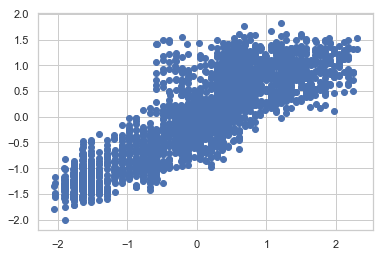

In [118]:
plt.scatter(y_test,huber_model_predicted_test)
plt.show()

In [119]:
resultsDf1 = pd.DataFrame({'intercept':huber_model_intercept,'R Square value train':huber_model_Rsquare_value_train,'R Square value':huber_model_Rsquare_value,'RMSE':huber_model_RMSE,'MSE':huber_model_MSE,'MAE':huber_model_MAE_score,'MAPE':huber_model_MAPE_score},index=['Huber Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
Huber Regression                 0.422009  1.283370  0.288428        0.715121   
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   
Linear Regression                0.422296  1.280847  0.288671        0.714877   

                                 R Square value train      RMSE  \
Huber Regression                             0.711770  0.537055   
Support Vector Model Regression              0.824993  0.535680   
Ridge Regression                             0.711848  0.537287   
Lasso Regression                             0.000000  1.006292   
Linear Regression                                 NaN  0.537281   

                                 Rsquare value train  intercept  
Huber Regression                                 NaN   0.000000  
Support Vector Model Regression                  NaN  -0.553730  
Ridge Regression                                 NaN  -0.003992  
Lasso Regression                                 NaN  -0.002685  
Linear Regression                           0.711839  -0.003971

### Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, criterion='absolute_error', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=-1, random_state=42, verbose=0, warm_start=False, ccp_alpha=0.0)
rf_model.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_features=1.0, n_jobs=-1,
                      random_state=42)

In [121]:
# R square on training data
print("R square value for training data ",rf_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",rf_model.score(x_test, y_test))
rf_model_Rsquare_value_train = rf_model.score(x_train, y_train)
rf_model_Rsquare_value = rf_model.score(x_test, y_test)

R square value for training data  0.9647965445861425
R square value for testing data  0.7496846432463621


In [122]:
#RMSE on Training data
rf_model_predicted_train=rf_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,rf_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,rf_model_predicted_train)))

#RMSE on Testing data
rf_model_predicted_test=rf_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,rf_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test)))

rf_model_MSE= (metrics.mean_squared_error(y_test,rf_model_predicted_test))
rf_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test))

Mean squared error for the training data is  0.03509264757124344
Root Mean squared error for the training data is  0.18733031674356246
Mean squared error for the testing data is  0.2534299206474402
Root Mean squared error for the testing data is  0.503418236307983


In [123]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_model_predicted_test))

rf_model_MAE_score = metrics.mean_absolute_error(y_test, rf_model_predicted_test)

Mean Absolute Error: 0.1458684039368882
Mean Absolute Error: 0.3966224479448078


In [124]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test))

rf_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test)

Mean Absolute Percentage Error: 1.2480429600622682


In [125]:
# accuracy for test scaled data
rf_model_accuracy = (1 - (rf_model_RMSE/y.mean()))
rf_model_accuracy

product_wg_ton    5.596227e+15
dtype: float64

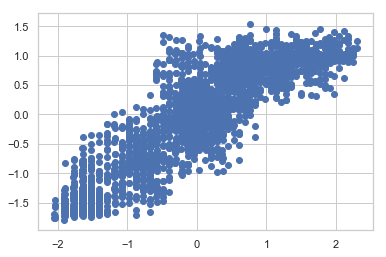

In [126]:
plt.scatter(y_test,rf_model_predicted_test)
plt.show()

In [127]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':rf_model_Rsquare_value_train,'R Square value':rf_model_Rsquare_value,'RMSE':rf_model_RMSE,'MSE':rf_model_MSE,'MAE':rf_model_MAE_score,'MAPE':rf_model_MAPE_score},index=['RF Model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
RF Model                         0.396622  1.248043  0.253430        0.749685   
Huber Regression                 0.422009  1.283370  0.288428        0.715121   
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   
Linear Regression                0.422296  1.280847  0.288671        0.714877   

                                 R Square value train      RMSE  \
RF Model                                     0.964797  0.503418   
Huber Regression                             0.711770  0.537055   
Support Vector Model Regression              0.824993  0.535680   
Ridge Regression                             0.711848  0.537287   
Lasso Regression                             0.000000  1.006292   
Linear Regression                                 NaN  0.537281   

                                 Rsquare value train   intercept  
RF Model                                         NaN         Nan  
Huber Regression                                 NaN           0  
Support Vector Model Regression                  NaN    -0.55373  
Ridge Regression                                 NaN -0.00399231  
Lasso Regression                                 NaN -0.00268507  
Linear Regression                           0.711839 -0.00397057

### Artificial Neural Network Regressor

In [128]:
from sklearn.neural_network import MLPRegressor
ann_model = MLPRegressor(hidden_layer_sizes=(200), activation='relu', solver='adam', alpha=0.01, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=42, tol=0.01, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ann_model.fit(x_train,y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=200, random_state=42, tol=0.01)

In [129]:
ann_model_intercept = ann_model.intercepts_[0]

print("The intercept for our model is {}".format(ann_model_intercept))

The intercept for our model is [ 0.06543229 -0.06654889  0.09475448  0.01111598 -0.02034296  0.16604232
  0.01249959 -0.19395169  0.0713632  -0.12282803  0.13133977  0.04574458
  0.14922917  0.00576401  0.00799197  0.05792329 -0.15360679  0.03618808
 -0.00854059 -0.1694367   0.02201862  0.14235941  0.08646711 -0.1365239
 -0.17064074  0.00580617  0.14569299 -0.15444055  0.1368376  -0.09519411
  0.0024332  -0.04413815  0.03791398 -0.09700587  0.02269841 -0.05329036
  0.06163706  0.10751973 -0.10298238  0.12490066 -0.02485181 -0.13648378
 -0.03374673 -0.16452528  0.021753    0.08977288 -0.09358572 -0.01576589
  0.08115057  0.16609198 -0.00286749  0.16119973  0.02303067 -0.0527069
  0.10619635  0.00947982  0.08752651  0.0127777   0.12714115  0.12932897
 -0.09028368 -0.11472332 -0.00575521  0.12153938 -0.11378021  0.10233693
  0.0414072  -0.05556679 -0.1141465   0.00022278  0.11076099 -0.04206667
 -0.11194904 -0.07956382 -0.06235526 -0.11454099 -0.09300645 -0.01512916
 -0.00865607 -0.076885

In [130]:
# R square on training data
print("R square value for training data ",ann_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ann_model.score(x_test, y_test))
ann_model_Rsquare_value_train = ann_model.score(x_train, y_train)
ann_model_Rsquare_value = ann_model.score(x_test, y_test)

R square value for training data  0.7776033494352714
R square value for testing data  0.7328129761439659


In [131]:
#RMSE on Training data
ann_model_predicted_train=ann_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ann_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ann_model_predicted_train)))

#RMSE on Testing data
ann_model_predicted_test=ann_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ann_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ann_model_predicted_test)))

ann_model_MSE= (metrics.mean_squared_error(y_test,ann_model_predicted_test))
ann_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ann_model_predicted_test))

Mean squared error for the training data is  0.2216966257301217
Root Mean squared error for the training data is  0.47084671149974244
Mean squared error for the testing data is  0.2705115144833253
Root Mean squared error for the testing data is  0.5201072144119184


In [132]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ann_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ann_model_predicted_test))

ann_model_MAE_score = metrics.mean_absolute_error(y_test, ann_model_predicted_test)

Mean Absolute Error: 0.3732779325030624
Mean Absolute Error: 0.41227026212561957


In [133]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ann_model_predicted_test))

ann_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ann_model_predicted_test)

Mean Absolute Percentage Error: 1.329750544548603


In [134]:
# accuracy for test scaled data
ann_model_accuracy = (1 - (ann_model_RMSE/y.mean()))
ann_model_accuracy

product_wg_ton    5.781749e+15
dtype: float64

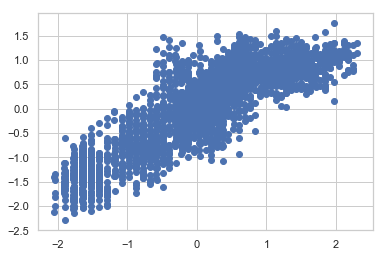

In [135]:
plt.scatter(y_test,ann_model_predicted_test)
plt.show()

In [136]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':ann_model_Rsquare_value_train,'R Square value':ann_model_Rsquare_value,'RMSE':ann_model_RMSE,'MSE':ann_model_MSE,'MAE':ann_model_MAE_score,'MAPE':ann_model_MAPE_score},index=['ANN model MLP Regressor'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
ANN model MLP Regressor          0.412270  1.329751  0.270512        0.732813   
RF Model                         0.396622  1.248043  0.253430        0.749685   
Huber Regression                 0.422009  1.283370  0.288428        0.715121   
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   
Linear Regression                0.422296  1.280847  0.288671        0.714877   

                                 R Square value train      RMSE  \
ANN model MLP Regressor                      0.777603  0.520107   
RF Model                                     0.964797  0.503418   
Huber Regression                             0.711770  0.537055   
Support Vector Model Regression              0.824993  0.535680   
Ridge Regression                             0.711848  0.537287   
Lasso Regression                             0.000000  1.006292   
Linear Regression                                 NaN  0.537281   

                                 Rsquare value train   intercept  
ANN model MLP Regressor                          NaN         Nan  
RF Model                                         NaN         Nan  
Huber Regression                                 NaN           0  
Support Vector Model Regression                  NaN    -0.55373  
Ridge Regression                                 NaN -0.00399231  
Lasso Regression                                 NaN -0.00268507  
Linear Regression                           0.711839 -0.00397057

### AdaBoost Regressor

In [137]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_model = AdaBoostRegressor(n_estimators=200, learning_rate=1.0, loss='exponential', random_state=42)
AdaBoost_model.fit(x_train, y_train)

AdaBoostRegressor(loss='exponential', n_estimators=200, random_state=42)

In [138]:
# R square on training data
print("R square value for training data ",AdaBoost_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",AdaBoost_model.score(x_test, y_test))
AdaBoost_model_Rsquare_value_train = AdaBoost_model.score(x_train, y_train)
AdaBoost_model_Rsquare_value = AdaBoost_model.score(x_test, y_test)

R square value for training data  0.702166509164774
R square value for testing data  0.6958706205445203


In [139]:
#RMSE on Training data
AdaBoost_model_predicted_train=AdaBoost_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,AdaBoost_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,AdaBoost_model_predicted_train)))

#RMSE on Testing data
AdaBoost_model_predicted_test=AdaBoost_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test)))

AdaBoost_model_MSE= (metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test))
AdaBoost_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test))

Mean squared error for the training data is  0.2968960179028194
Root Mean squared error for the training data is  0.5448816549516229
Mean squared error for the testing data is  0.30791352756601215
Root Mean squared error for the testing data is  0.5548995652962905


In [140]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, AdaBoost_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, AdaBoost_model_predicted_test))

AdaBoost_model_MAE_score = metrics.mean_absolute_error(y_test, AdaBoost_model_predicted_test)

Mean Absolute Error: 0.4527772946198194
Mean Absolute Error: 0.4610216880095122


In [141]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, AdaBoost_model_predicted_test))

AdaBoost_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test,AdaBoost_model_predicted_test)

Mean Absolute Percentage Error: 1.4841128045149632


In [142]:
# accuracy for test scaled data
AdaBoost_model_accuracy = (1 - (AdaBoost_model_RMSE/y.mean()))
AdaBoost_model_accuracy

product_wg_ton    6.168517e+15
dtype: float64

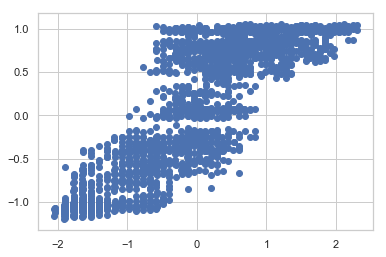

In [143]:
plt.scatter(y_test,AdaBoost_model_predicted_test)
plt.show()

In [144]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':AdaBoost_model_Rsquare_value_train,'R Square value':AdaBoost_model_Rsquare_value,'RMSE':AdaBoost_model_RMSE,'MSE':AdaBoost_model_MSE,'MAE':AdaBoost_model_MAE_score,'MAPE':AdaBoost_model_MAPE_score},index=['AdaBoost Regression model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  R Square value  \
AdaBoost Regression model        0.461022  1.484113  0.307914        0.695871   
ANN model MLP Regressor          0.412270  1.329751  0.270512        0.732813   
RF Model                         0.396622  1.248043  0.253430        0.749685   
Huber Regression                 0.422009  1.283370  0.288428        0.715121   
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   
Linear Regression                0.422296  1.280847  0.288671        0.714877   

                                 R Square value train      RMSE  \
AdaBoost Regression model                    0.702167  0.554900   
ANN model MLP Regressor                      0.777603  0.520107   
RF Model                                     0.964797  0.503418   
Huber Regression                             0.711770  0.537055   
Support Vector Model Regression              0.824993  0.535680   
Ridge Regression                             0.711848  0.537287   
Lasso Regression                             0.000000  1.006292   
Linear Regression                                 NaN  0.537281   

                                 Rsquare value train   intercept  
AdaBoost Regression model                        NaN         Nan  
ANN model MLP Regressor                          NaN         Nan  
RF Model                                         NaN         Nan  
Huber Regression                                 NaN           0  
Support Vector Model Regression                  NaN    -0.55373  
Ridge Regression                                 NaN -0.00399231  
Lasso Regression                                 NaN -0.00268507  
Linear Regression                           0.711839 -0.00397057

In [145]:
resultsDf.sort_values(['MSE'], ascending=True)

MAE      MAPE       MSE  R Square value  \
RF Model                         0.396622  1.248043  0.253430        0.749685   
ANN model MLP Regressor          0.412270  1.329751  0.270512        0.732813   
Support Vector Model Regression  0.420699  1.336387  0.286953        0.716574   
Huber Regression                 0.422009  1.283370  0.288428        0.715121   
Linear Regression                0.422296  1.280847  0.288671        0.714877   
Ridge Regression                 0.422299  1.280297  0.288678        0.714870   
AdaBoost Regression model        0.461022  1.484113  0.307914        0.695871   
Lasso Regression                 0.817240  1.000787  1.012623       -0.000178   

                                 R Square value train      RMSE  \
RF Model                                     0.964797  0.503418   
ANN model MLP Regressor                      0.777603  0.520107   
Support Vector Model Regression              0.824993  0.535680   
Huber Regression                             0.711770  0.537055   
Linear Regression                                 NaN  0.537281   
Ridge Regression                             0.711848  0.537287   
AdaBoost Regression model                    0.702167  0.554900   
Lasso Regression                             0.000000  1.006292   

                                 Rsquare value train   intercept  
RF Model                                         NaN         Nan  
ANN model MLP Regressor                          NaN         Nan  
Support Vector Model Regression                  NaN    -0.55373  
Huber Regression                                 NaN           0  
Linear Regression                           0.711839 -0.00397057  
Ridge Regression                                 NaN -0.00399231  
AdaBoost Regression model                        NaN         Nan  
Lasso Regression                                 NaN -0.00268507

### 2). Model Tuning and business implication.
##### a.Ensemble modelling, wherever applicable
##### b. Any other model tuning measures(if applicable)
##### c. Interpretation of the most optimum model and its implication on the business

##### Random Forest Regressor

In [146]:
rf_gridsearch = {'max_depth': [20, 40, 60, 80, 100, 120],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [150, 200, 250]}

In [147]:
from sklearn.model_selection import RandomizedSearchCV
rf_model2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_model_grid = RandomizedSearchCV(estimator = rf_model2, param_distributions = rf_gridsearch, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_model_grid = GridSearchCV(estimator = rf_model2, param_distributions = rf_gridsearch, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_model_grid

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 40, 60, 80, 100, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, verbose=2)

In [148]:

rf_model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 40, 60, 80, 100, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, verbose=2)

In [149]:
rf_model_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [150]:
rf_best_model = rf_model_grid.best_estimator_
rf_best_model

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [151]:
# R square on training data
print("R square value for training data ",rf_best_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",rf_best_model.score(x_test, y_test))
rf_best_model_Rsquare_value_train = rf_best_model.score(x_train, y_train)
rf_best_model_Rsquare_value = rf_best_model.score(x_test, y_test)

R square value for training data  0.8995615739370619
R square value for testing data  0.7528227319905008


In [152]:
#RMSE on Training data
rf_best_model_predicted_train=rf_best_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,rf_best_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,rf_best_model_predicted_train)))

#RMSE on Testing data
rf_best_model_predicted_test=rf_best_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,rf_best_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,rf_best_model_predicted_test)))

rf_best_model_MSE= (metrics.mean_squared_error(y_test,rf_best_model_predicted_test))
rf_best_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,rf_best_model_predicted_test))

Mean squared error for the training data is  0.1000949310077825
Root Mean squared error for the training data is  0.3163778295136726
Mean squared error for the testing data is  0.24992776370322636
Root Mean squared error for the testing data is  0.4999277584843898


In [153]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_best_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_best_model_predicted_test))

rf_best_model_MAE_score = metrics.mean_absolute_error(y_test, rf_best_model_predicted_test)

Mean Absolute Error: 0.24338012476772533
Mean Absolute Error: 0.39539155924888203


In [154]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, rf_best_model_predicted_test))

rf_best_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, rf_best_model_predicted_test)

Mean Absolute Percentage Error: 1.2531876379631535


In [155]:
# accuracy for test scaled data
rf_best_model_accuracy = (1 - (rf_best_model_RMSE/y.mean()))
rf_best_model_accuracy

product_wg_ton    5.557425e+15
dtype: float64

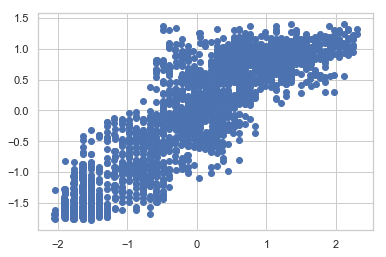

In [156]:
plt.scatter(y_test,rf_best_model_predicted_test)
plt.show()

In [157]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':rf_best_model_Rsquare_value_train,'R Square value':rf_best_model_Rsquare_value,'RMSE':rf_best_model_RMSE,'MSE':rf_best_model_MSE,'MAE':rf_best_model_MAE_score,'MAPE':rf_best_model_MAPE_score},index=['Random Forest Regression model tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  \
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  
Random Forest Regression model tuning         Nan  
AdaBoost Regression model                     Nan  
ANN model MLP Regressor                       Nan  
RF Model                                      Nan  
Huber Regression                                0  
Support Vector Model Regression          -0.55373  
Ridge Regression                      -0.00399231  
Lasso Regression                      -0.00268507  
Linear Regression                     -0.00397057

### Ada Boosting Regressor

In [158]:
ada_params = {'n_estimators': [100, 200, 500, 1000],
          'learning_rate': [10, 20, 30, 50],
          'loss': ['linear', 'square', 'exponential']
             }

In [159]:
from sklearn.ensemble import AdaBoostRegressor
ada1 = AdaBoostRegressor(random_state=42)
ada_boosting = RandomizedSearchCV(estimator = ada1, param_distributions = ada_params, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
ada_boosting.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [10, 20, 30, 50],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [160]:
ada_boosting.best_params_

{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 10}

In [161]:
ada_boosting_model = ada_boosting.best_estimator_
ada_boosting_model

AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=100,
                  random_state=42)

In [162]:
# R square on training data
print("R square value for training data ",ada_boosting_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ada_boosting_model.score(x_test, y_test))
ada_boosting_model_Rsquare_value_train = ada_boosting_model.score(x_train, y_train)
ada_boosting_model_Rsquare_value = ada_boosting_model.score(x_test, y_test)

R square value for training data  0.4396371508425988
R square value for testing data  0.42895869298009626


In [163]:
#RMSE on Training data
ada_boosting_model_predicted_train=ada_boosting_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ada_boosting_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ada_boosting_model_predicted_train)))

#RMSE on Testing data
ada_boosting_model_predicted_test=ada_boosting_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test, ada_boosting_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test, ada_boosting_model_predicted_test)))

ada_boosting_model_MSE= (metrics.mean_squared_error(y_test,ada_boosting_model_predicted_test))
ada_boosting_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ada_boosting_model_predicted_test))

Mean squared error for the training data is  0.5585990280305757
Root Mean squared error for the training data is  0.7473948274042146
Mean squared error for the testing data is  0.5781465228555599
Root Mean squared error for the testing data is  0.7603594694981841


In [164]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ada_boosting_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_boosting_model_predicted_test))

ada_boosting_model_MAE_score = metrics.mean_absolute_error(y_test, ada_boosting_model_predicted_test)

Mean Absolute Error: 0.5969521872099579
Mean Absolute Error: 0.6034548305222793


In [165]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ada_boosting_model_predicted_test))

ada_boosting_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ada_boosting_model_predicted_test)

Mean Absolute Percentage Error: 1.2758834043466822


In [166]:
# accuracy for test scaled data
ada_boosting_model_accuracy = (1 - (ada_boosting_model_RMSE/y.mean()))
ada_boosting_model_accuracy

product_wg_ton    8.452503e+15
dtype: float64

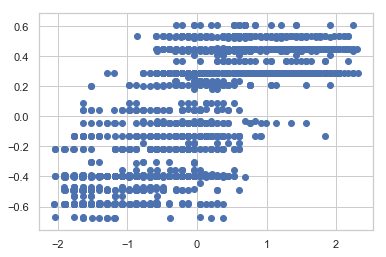

In [167]:
plt.scatter(y_test, ada_boosting_model_predicted_test)
plt.show()

In [168]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':ada_boosting_model_Rsquare_value_train,'R Square value':ada_boosting_model_Rsquare_value,'RMSE':ada_boosting_model_RMSE,'MSE':ada_boosting_model_MSE,'MAE':ada_boosting_model_MAE_score,'MAPE':ada_boosting_model_MAPE_score},index=['ADA boosting Regression model tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  \
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
ADA boosting Regression model tuning         0.428959              0.439637   
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
ADA boosting Regression model tuning   0.760359                  NaN   
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  
ADA boosting Regression model tuning          Nan  
Random Forest Regression model tuning         Nan  
AdaBoost Regression model                     Nan  
ANN model MLP Regressor                       Nan  
RF Model                                      Nan  
Huber Regression                                0  
Support Vector Model Regression          -0.55373  
Ridge Regression                      -0.00399231  
Lasso Regression                      -0.00268507  
Linear Regression                     -0.00397057

### Bagging Regressor

In [169]:
bagging_params = {"n_estimators": [50,100,150],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,1]}
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging =  RandomizedSearchCV(estimator = bagging_reg, param_distributions = bagging_params, n_iter = 1000, cv = 3, verbose=2,random_state=42, n_jobs = -1)
# Fit the random search model
bagging.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=BaggingRegressor(), n_iter=1000, n_jobs=-1,
                   param_distributions={'max_features': [1, 2, 4, 6, 8],
                                        'max_samples': [0.5, 1],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=2)

In [170]:
bagging.best_params_

{'n_estimators': 50, 'max_samples': 0.5, 'max_features': 8}

In [171]:
bagging_model = bagging.best_estimator_
bagging_model

BaggingRegressor(max_features=8, max_samples=0.5, n_estimators=50)

In [172]:
# R square on training data
print("R square value for training data ",bagging_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",bagging_model.score(x_test, y_test))
bagging_model_Rsquare_value_train = bagging_model.score(x_train, y_train)
bagging_model_Rsquare_value = bagging_model.score(x_test, y_test)

R square value for training data  0.6027028141291111
R square value for testing data  0.2558257082067964


In [173]:
#RMSE on Training data
bagging_model_predicted_train=bagging_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,bagging_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,bagging_model_predicted_train)))

#RMSE on Testing data
bagging_model_predicted_test=bagging_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test, bagging_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test, bagging_model_predicted_test)))

bagging_model_MSE= (metrics.mean_squared_error(y_test,bagging_model_predicted_test))
bagging_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,bagging_model_predicted_test))

Mean squared error for the training data is  0.35058320815167454
Root Mean squared error for the training data is  0.5921006740003549
Mean squared error for the testing data is  0.660298745281547
Root Mean squared error for the testing data is  0.8125876846725817


In [174]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, bagging_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, bagging_model_predicted_test))

bagging_model_MAE_score = metrics.mean_absolute_error(y_test, bagging_model_predicted_test)

Mean Absolute Error: 0.4784914880915685
Mean Absolute Error: 0.652715004989947


In [175]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, bagging_model_predicted_test))

bagging_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, bagging_model_predicted_test)

Mean Absolute Percentage Error: 1.0169903284964843


In [176]:
# accuracy for test scaled data
bagging_model_accuracy = (1 - (bagging_model_RMSE/y.mean()))
bagging_model_accuracy

product_wg_ton    9.033096e+15
dtype: float64

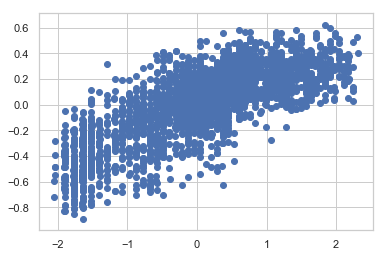

In [177]:
plt.scatter(y_test, bagging_model_predicted_test)
plt.show()

In [178]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':bagging_model_Rsquare_value_train,'R Square value':bagging_model_Rsquare_value,'RMSE':bagging_model_RMSE,'MSE':bagging_model_MSE,'MAE':bagging_model_MAE_score,'MAPE':bagging_model_MAPE_score},index=['Bagging Regression model tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  \
Bagging Regression model tuning        0.652715  1.016990  0.660299   
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
Bagging Regression model tuning              0.255826              0.602703   
ADA boosting Regression model tuning         0.428959              0.439637   
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
Bagging Regression model tuning        0.812588                  NaN   
ADA boosting Regression model tuning   0.760359                  NaN   
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  
Bagging Regression model tuning               Nan  
ADA boosting Regression model tuning          Nan  
Random Forest Regression model tuning         Nan  
AdaBoost Regression model                     Nan  
ANN model MLP Regressor                       Nan  
RF Model                                      Nan  
Huber Regression                                0  
Support Vector Model Regression          -0.55373  
Ridge Regression                      -0.00399231  
Lasso Regression                      -0.00268507  
Linear Regression                     -0.00397057

### Ridge Regression

In [179]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
           'random_state':[42,273,450,236,970],
           'tol':[0.001,0.0001], 
            'solver':['auto','svd'],
           'fit_intercept':[True]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'fit_intercept': [True],
                         'random_state': [42, 273, 450, 236, 970],
                         'solver': ['auto', 'svd'], 'tol': [0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [180]:
ridge_regressor.best_params_

{'alpha': 20,
 'fit_intercept': True,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.001}

In [181]:
ridge_regressor = ridge_regressor.best_estimator_
ridge_regressor

Ridge(alpha=20, random_state=42)

In [182]:
# R square on training data
print("R square value for training data ",ridge_regressor.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ridge_regressor.score(x_test, y_test))
ridge_regressor_model_Rsquare_value_train = ridge_regressor.score(x_train, y_train)
ridge_regressor_model_Rsquare_value = ridge_regressor.score(x_test, y_test)

R square value for training data  0.7118444078318602
R square value for testing data  0.7148166970351346


In [183]:
#RMSE on Training data
ridge_regressor_predicted_train=ridge_regressor.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ridge_regressor_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ridge_regressor_predicted_train)))

#RMSE on Testing data
ridge_regressor_predicted_test=ridge_regressor.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ridge_regressor_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ridge_regressor_predicted_test)))

ridge_regressor_model_MSE= (metrics.mean_squared_error(y_test,ridge_regressor_predicted_test))
ridge_regressor_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ridge_regressor_predicted_test))

Mean squared error for the training data is  0.28724858178719953
Root Mean squared error for the training data is  0.535955764767205
Mean squared error for the testing data is  0.2887317133782299
Root Mean squared error for the testing data is  0.537337615822892


In [184]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_regressor_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_regressor_predicted_test))

ridge_regressor_model_MAE_score = metrics.mean_absolute_error(y_test, ridge_regressor_predicted_test)

Mean Absolute Error: 0.4249243262763847
Mean Absolute Error: 0.4224104606872155


In [185]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ridge_regressor_predicted_test))

ridge_regressor_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ridge_regressor_predicted_test)

Mean Absolute Percentage Error: 1.2785270014265517


In [186]:
# accuracy for test scaled data
ridge_regressor_accuracy = (1 - (ridge_regressor_model_RMSE/y.mean()))
ridge_regressor_accuracy

product_wg_ton    5.973290e+15
dtype: float64

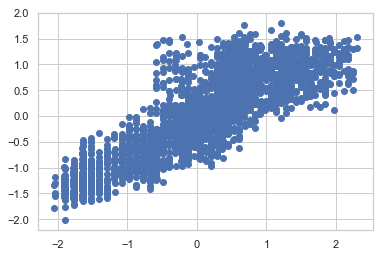

In [187]:
plt.scatter(y_test,ridge_regressor_predicted_test)
plt.show()

In [188]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':ridge_regressor_model_Rsquare_value_train,'R Square value':ridge_regressor_model_Rsquare_value,'RMSE':ridge_regressor_model_RMSE,'MSE':ridge_regressor_model_MSE,'MAE':ridge_regressor_model_MAE_score,'MAPE':ridge_regressor_model_MAPE_score},index=['Ridge Regression with model Tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  \
Ridge Regression with model Tuning     0.422410  1.278527  0.288732   
Bagging Regression model tuning        0.652715  1.016990  0.660299   
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
Ridge Regression with model Tuning           0.714817              0.711844   
Bagging Regression model tuning              0.255826              0.602703   
ADA boosting Regression model tuning         0.428959              0.439637   
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
Ridge Regression with model Tuning     0.537338                  NaN   
Bagging Regression model tuning        0.812588                  NaN   
ADA boosting Regression model tuning   0.760359                  NaN   
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  
Ridge Regression with model Tuning            Nan  
Bagging Regression model tuning               Nan  
ADA boosting Regression model tuning          Nan  
Random Forest Regression model tuning         Nan  
AdaBoost Regression model                     Nan  
ANN model MLP Regressor                       Nan  
RF Model                                      Nan  
Huber Regression                                0  
Support Vector Model Regression          -0.55373  
Ridge Regression                      -0.00399231  
Lasso Regression                      -0.00268507  
Linear Regression                     -0.00397057

### ANN model with hyper parameter tuning

In [190]:
ann_gridsearch = {"hidden_layer_sizes": [1,50],
                  "activation": ["identity", 
                  "logistic", "tanh", "relu"],
                  "solver": ["lbfgs", "sgd", "adam"],
                  "alpha": [0.00005,0.0005],
                 "max_iter":[100,300],
                 "tol":[0.0001,0.000001]}

In [191]:
ann_model2 = MLPRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ann_model_grid = RandomizedSearchCV(estimator =ann_model2, param_distributions = ann_gridsearch, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

ann_model_grid.fit(x_train, y_train)
ann_model_grid

Fitting 3 folds for each of 192 candidates, totalling 576 fits


RandomizedSearchCV(cv=3, estimator=MLPRegressor(), n_iter=1000, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [5e-05, 0.0005],
                                        'hidden_layer_sizes': [1, 50],
                                        'max_iter': [100, 300],
                                        'solver': ['lbfgs', 'sgd', 'adam'],
                                        'tol': [0.0001, 1e-06]},
                   random_state=42, verbose=2)

In [192]:
ann_model_grid.best_params_

{'tol': 1e-06,
 'solver': 'lbfgs',
 'max_iter': 100,
 'hidden_layer_sizes': 1,
 'alpha': 5e-05,
 'activation': 'relu'}

In [193]:
ann_best_model = ann_model_grid.best_estimator_
ann_best_model

MLPRegressor(alpha=5e-05, hidden_layer_sizes=1, max_iter=100, solver='lbfgs',
             tol=1e-06)

In [197]:
# R square on training data
print("R square value for training data ",ann_best_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ann_best_model.score(x_test, y_test))
ann_best_model_Rsquare_value_train = ann_best_model.score(x_train, y_train)
ann_best_model_Rsquare_value = ann_best_model.score(x_test, y_test)                                                              

R square value for training data  0.7438463677219264
R square value for testing data  0.7385995100135008


In [198]:
#RMSE on Training data
ann_best_model_predicted_train=ann_best_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ann_best_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ann_best_model_predicted_train)))

#RMSE on Testing data
ann_best_model_predicted_test=ann_best_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ann_best_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ann_best_model_predicted_test)))

ann_best_model_MSE= (metrics.mean_squared_error(y_test,ann_best_model_predicted_test))
ann_best_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ann_best_model_predicted_test))

Mean squared error for the training data is  0.25534709874153905
Root Mean squared error for the training data is  0.5053188090122305
Mean squared error for the testing data is  0.26463514591835285
Root Mean squared error for the testing data is  0.5144270073765109


In [199]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ann_best_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ann_best_model_predicted_test))

ann_best_model_MAE_score = metrics.mean_absolute_error(y_test, ann_best_model_predicted_test)

Mean Absolute Error: 0.4004900386156925
Mean Absolute Error: 0.41033367908514595


In [200]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ann_best_model_predicted_test))

ann_best_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ann_best_model_predicted_test)

Mean Absolute Percentage Error: 1.371283628665219


In [201]:
# accuracy for test scaled data
ann_best_model_accuracy = (1 - (ann_best_model_RMSE/y.mean()))
ann_best_model_accuracy

product_wg_ton    5.718606e+15
dtype: float64

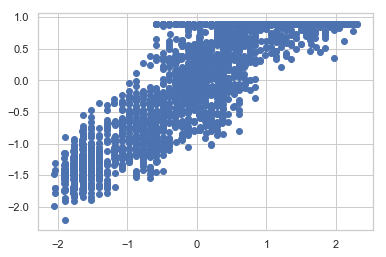

In [202]:
plt.scatter(y_test,ann_best_model_predicted_test)
plt.show()

In [203]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':ann_best_model_Rsquare_value_train,'R Square value':ann_best_model_Rsquare_value,'RMSE':ann_best_model_RMSE,'MSE':ann_best_model_MSE,'MAE':ann_best_model_MAE_score,'MAPE':ann_best_model_MAPE_score},index=['ann Regression model tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE      MAPE       MSE  \
ann Regression model tuning            0.410334  1.371284  0.264635   
Ridge Regression with model Tuning     0.422410  1.278527  0.288732   
Bagging Regression model tuning        0.652715  1.016990  0.660299   
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
ann Regression model tuning                  0.738600              0.743846   
Ridge Regression with model Tuning           0.714817              0.711844   
Bagging Regression model tuning              0.255826              0.602703   
ADA boosting Regression model tuning         0.428959              0.439637   
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
ann Regression model tuning            0.514427                  NaN   
Ridge Regression with model Tuning     0.537338                  NaN   
Bagging Regression model tuning        0.812588                  NaN   
ADA boosting Regression model tuning   0.760359                  NaN   
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  
ann Regression model tuning                   Nan  
Ridge Regression with model Tuning            Nan  
Bagging Regression model tuning               Nan  
ADA boosting Regression model tuning          Nan  
Random Forest Regression model tuning         Nan  
AdaBoost Regression model                     Nan  
ANN model MLP Regressor                       Nan  
RF Model                                      Nan  
Huber Regression                                0  
Support Vector Model Regression          -0.55373  
Ridge Regression                      -0.00399231  
Lasso Regression                      -0.00268507  
Linear Regression                     -0.00397057

In [204]:
for i in range(0,len(resultsDf)):
    resultsDf['RMSE / MAE'] = resultsDf['RMSE']/resultsDf['MAE']
resultsDf

MAE      MAPE       MSE  \
ann Regression model tuning            0.410334  1.371284  0.264635   
Ridge Regression with model Tuning     0.422410  1.278527  0.288732   
Bagging Regression model tuning        0.652715  1.016990  0.660299   
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
RF Model                               0.396622  1.248043  0.253430   
Huber Regression                       0.422009  1.283370  0.288428   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Ridge Regression                       0.422299  1.280297  0.288678   
Lasso Regression                       0.817240  1.000787  1.012623   
Linear Regression                      0.422296  1.280847  0.288671   

                                       R Square value  R Square value train  \
ann Regression model tuning                  0.738600              0.743846   
Ridge Regression with model Tuning           0.714817              0.711844   
Bagging Regression model tuning              0.255826              0.602703   
ADA boosting Regression model tuning         0.428959              0.439637   
Random Forest Regression model tuning        0.752823              0.899562   
AdaBoost Regression model                    0.695871              0.702167   
ANN model MLP Regressor                      0.732813              0.777603   
RF Model                                     0.749685              0.964797   
Huber Regression                             0.715121              0.711770   
Support Vector Model Regression              0.716574              0.824993   
Ridge Regression                             0.714870              0.711848   
Lasso Regression                            -0.000178              0.000000   
Linear Regression                            0.714877                   NaN   

                                           RMSE  Rsquare value train  \
ann Regression model tuning            0.514427                  NaN   
Ridge Regression with model Tuning     0.537338                  NaN   
Bagging Regression model tuning        0.812588                  NaN   
ADA boosting Regression model tuning   0.760359                  NaN   
Random Forest Regression model tuning  0.499928                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
RF Model                               0.503418                  NaN   
Huber Regression                       0.537055                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Ridge Regression                       0.537287                  NaN   
Lasso Regression                       1.006292                  NaN   
Linear Regression                      0.537281             0.711839   

                                        intercept  RMSE / MAE  
ann Regression model tuning                   Nan    1.253680  
Ridge Regression with model Tuning            Nan    1.272075  
Bagging Regression model tuning               Nan    1.244935  
ADA boosting Regression model tuning          Nan    1.260011  
Random Forest Regression model tuning         Nan    1.264387  
AdaBoost Regression model                     Nan    1.203630  
ANN model MLP Regressor                       Nan    1.261569  
RF Model                                      Nan    1.269263  
Huber Regression                                0    1.272617  
Support Vector Model Regression          -0.55373    1.273309  
Ridge Regression                      -0.00399231    1.272293  
Lasso Regression                      -0.00268507    1.231329  
Linear Regression                     -0.00397057    1.272284

In [205]:
resultsDf.sort_values(['MSE'], ascending=True)

MAE      MAPE       MSE  \
Random Forest Regression model tuning  0.395392  1.253188  0.249928   
RF Model                               0.396622  1.248043  0.253430   
ann Regression model tuning            0.410334  1.371284  0.264635   
ANN model MLP Regressor                0.412270  1.329751  0.270512   
Support Vector Model Regression        0.420699  1.336387  0.286953   
Huber Regression                       0.422009  1.283370  0.288428   
Linear Regression                      0.422296  1.280847  0.288671   
Ridge Regression                       0.422299  1.280297  0.288678   
Ridge Regression with model Tuning     0.422410  1.278527  0.288732   
AdaBoost Regression model              0.461022  1.484113  0.307914   
ADA boosting Regression model tuning   0.603455  1.275883  0.578147   
Bagging Regression model tuning        0.652715  1.016990  0.660299   
Lasso Regression                       0.817240  1.000787  1.012623   

                                       R Square value  R Square value train  \
Random Forest Regression model tuning        0.752823              0.899562   
RF Model                                     0.749685              0.964797   
ann Regression model tuning                  0.738600              0.743846   
ANN model MLP Regressor                      0.732813              0.777603   
Support Vector Model Regression              0.716574              0.824993   
Huber Regression                             0.715121              0.711770   
Linear Regression                            0.714877                   NaN   
Ridge Regression                             0.714870              0.711848   
Ridge Regression with model Tuning           0.714817              0.711844   
AdaBoost Regression model                    0.695871              0.702167   
ADA boosting Regression model tuning         0.428959              0.439637   
Bagging Regression model tuning              0.255826              0.602703   
Lasso Regression                            -0.000178              0.000000   

                                           RMSE  Rsquare value train  \
Random Forest Regression model tuning  0.499928                  NaN   
RF Model                               0.503418                  NaN   
ann Regression model tuning            0.514427                  NaN   
ANN model MLP Regressor                0.520107                  NaN   
Support Vector Model Regression        0.535680                  NaN   
Huber Regression                       0.537055                  NaN   
Linear Regression                      0.537281             0.711839   
Ridge Regression                       0.537287                  NaN   
Ridge Regression with model Tuning     0.537338                  NaN   
AdaBoost Regression model              0.554900                  NaN   
ADA boosting Regression model tuning   0.760359                  NaN   
Bagging Regression model tuning        0.812588                  NaN   
Lasso Regression                       1.006292                  NaN   

                                        intercept  RMSE / MAE  
Random Forest Regression model tuning         Nan    1.264387  
RF Model                                      Nan    1.269263  
ann Regression model tuning                   Nan    1.253680  
ANN model MLP Regressor                       Nan    1.261569  
Support Vector Model Regression          -0.55373    1.273309  
Huber Regression                                0    1.272617  
Linear Regression                     -0.00397057    1.272284  
Ridge Regression                      -0.00399231    1.272293  
Ridge Regression with model Tuning            Nan    1.272075  
AdaBoost Regression model                     Nan    1.203630  
ADA boosting Regression model tuning          Nan    1.260011  
Bagging Regression model tuning               Nan    1.244935  
Lasso Regression                      -0.00268507    1.231329

In [206]:
y.rename(columns = {'product_wg_ton':'product_wg_ton_Actual'},inplace=True)
y['product_wg_ton_Actual'].head()

Ware_house_ID
WH_100004    0.037819
WH_100005    0.687847
WH_100006    0.532529
WH_100008   -0.490409
WH_100010   -0.216140
Name: product_wg_ton_Actual, dtype: float64

In [222]:
features = x.columns
resultsDf3 = pd.concat([pd.DataFrame(features),pd.DataFrame(rf_best_model.feature_importances_)],axis=1)
resultsDf3.columns =['Features','Importance']
resultsDf3.sort_values(['Importance'], ascending=False).reset_index(drop=True).head(7)

Features  Importance
0                       wh_est_year    0.816591
1                   retail_shop_num    0.024038
2                     dist_from_hub    0.023038
3                   distributor_num    0.020069
4                       workers_num    0.016743
5                    govt_check_l3m    0.014216
6               transport_issue_l1y    0.013239
7   approved_wh_govt_certificate_A+    0.010710
8                num_refill_req_l3m    0.008776
9                  wh_breakdown_l3m    0.008203
10                Competitor_in_mkt    0.006463
11   approved_wh_govt_certificate_B    0.004999

In [219]:
final_predictions = pd.DataFrame(rf_best_model.predict(x))
final_predictions = final_predictions.set_index(df.index)
pred_minus_actual = final_predictions[0] - y['product_wg_ton_Actual']
pred_minus_actual = pd.DataFrame(pred_minus_actual)
submission = pd.concat([y['product_wg_ton_Actual'],final_predictions],axis=1)
submission.rename(columns={0: "product_wg_ton_Predicted"},inplace=True)
submission = pd.concat([submission,pred_minus_actual],axis=1)
submission.rename(columns={0: "pred_minus_actual"},inplace=True)
submission = submission.set_index((df.index))
submission.to_csv('submission.csv',index = True)